# LATIN AMERICA LEFT-LEANING POPULISM INDEX

## Index Visualizations

**Nicolas Cachanosky**  
Center for Free Enterprise  
The University of Texas at El Paso  
ncachanosky@utep.edu  
www.ncachanosky.com

**J. P. Bastos**  
Free Market Institute  
Texas Tech University  
jpmvbastos@gmail.com  
https://www.jpmvbastos.com/

Version: 1.0  
Last update: 08-Mar-2025

In [163]:
# ============================================================================|
# %% LOAD PACKAGES, SETTINGS, AND DATA

#### Packages
import os
import numpy                   as np
import pandas                  as pd
import matplotlib.pyplot       as plt
import matplotlib              as mpl
import matplotlib.font_manager as fm

#### General settings
PATH = '/Users/jpmvbastos/Documents/GitHub/populism-index/2025/'
os.chdir(PATH)

#### Load data
FILE  = "index_2025.xlsx"
FILE  = pd.ExcelFile(FILE)

INDEX = pd.read_excel(FILE)
INDEX = INDEX[INDEX['YEAR'] >= 2000]  


In [164]:
# %% PLOT SETTINGS

'''
#### Style
print(plt.style.available)
plt.style.use('_mpl-gallery')

### Fonts
font_dir = ['/System/Library/Fonts', '/Library/Fonts', os.path.expanduser('~/Library/Fonts')]

for dir in font_dir:
    for font in fm.findSystemFonts(fontpaths=[dir]):
        if font.endswith(('.ttf', '.otf')):
            try:
                fm.fontManager.addfont(font)
            except (RuntimeError, TypeError):
                continue  # Skip fonts that cause errors
                
available_fonts = sorted({f.name for f in fm.fontManager.ttflist})
print(available_fonts)
'''

mpl.rcParams["font.family"] = "Georgia"
mpl.rcParams["figure.facecolor"]   = "white"
mpl.rcParams["axes.facecolor"]     = "white"
mpl.rcParams["font.size"]          =  10
mpl.rcParams["axes.titlesize"]     =  12
mpl.rcParams["lines.linewidth"]    =   2
mpl.rcParams["figure.dpi"]         = 300
mpl.rcParams["axes.spines.top"]    = True
mpl.rcParams["axes.spines.right"]  = True
mpl.rcParams["axes.spines.bottom"] = True
mpl.rcParams["axes.spines.left"]   = True
mpl.rcParams["axes.edgecolor"]     = "lightgray"
plt.rcParams["grid.color"]         = "lightgray"

#### Color Palette: Aspect
colors = ['#F07F09',        # 0 Orange
          '#9F2936',        # 1 Red
          '#1B587C',        # 2 Blue
          '#4E8542',        # 3 Green
          '#604878',        # 4 Purple
          '#C19859',        # 5 Brown
          ]

mpl.rcParams["axes.prop_cycle"] = plt.cycler(color=colors)


#### Size
fig_word      = ( 6.5, 3.5)
fig_landscape = (16  , 9)
fig_square    = ( 3  , 3)

## Time Series: Individual Countries

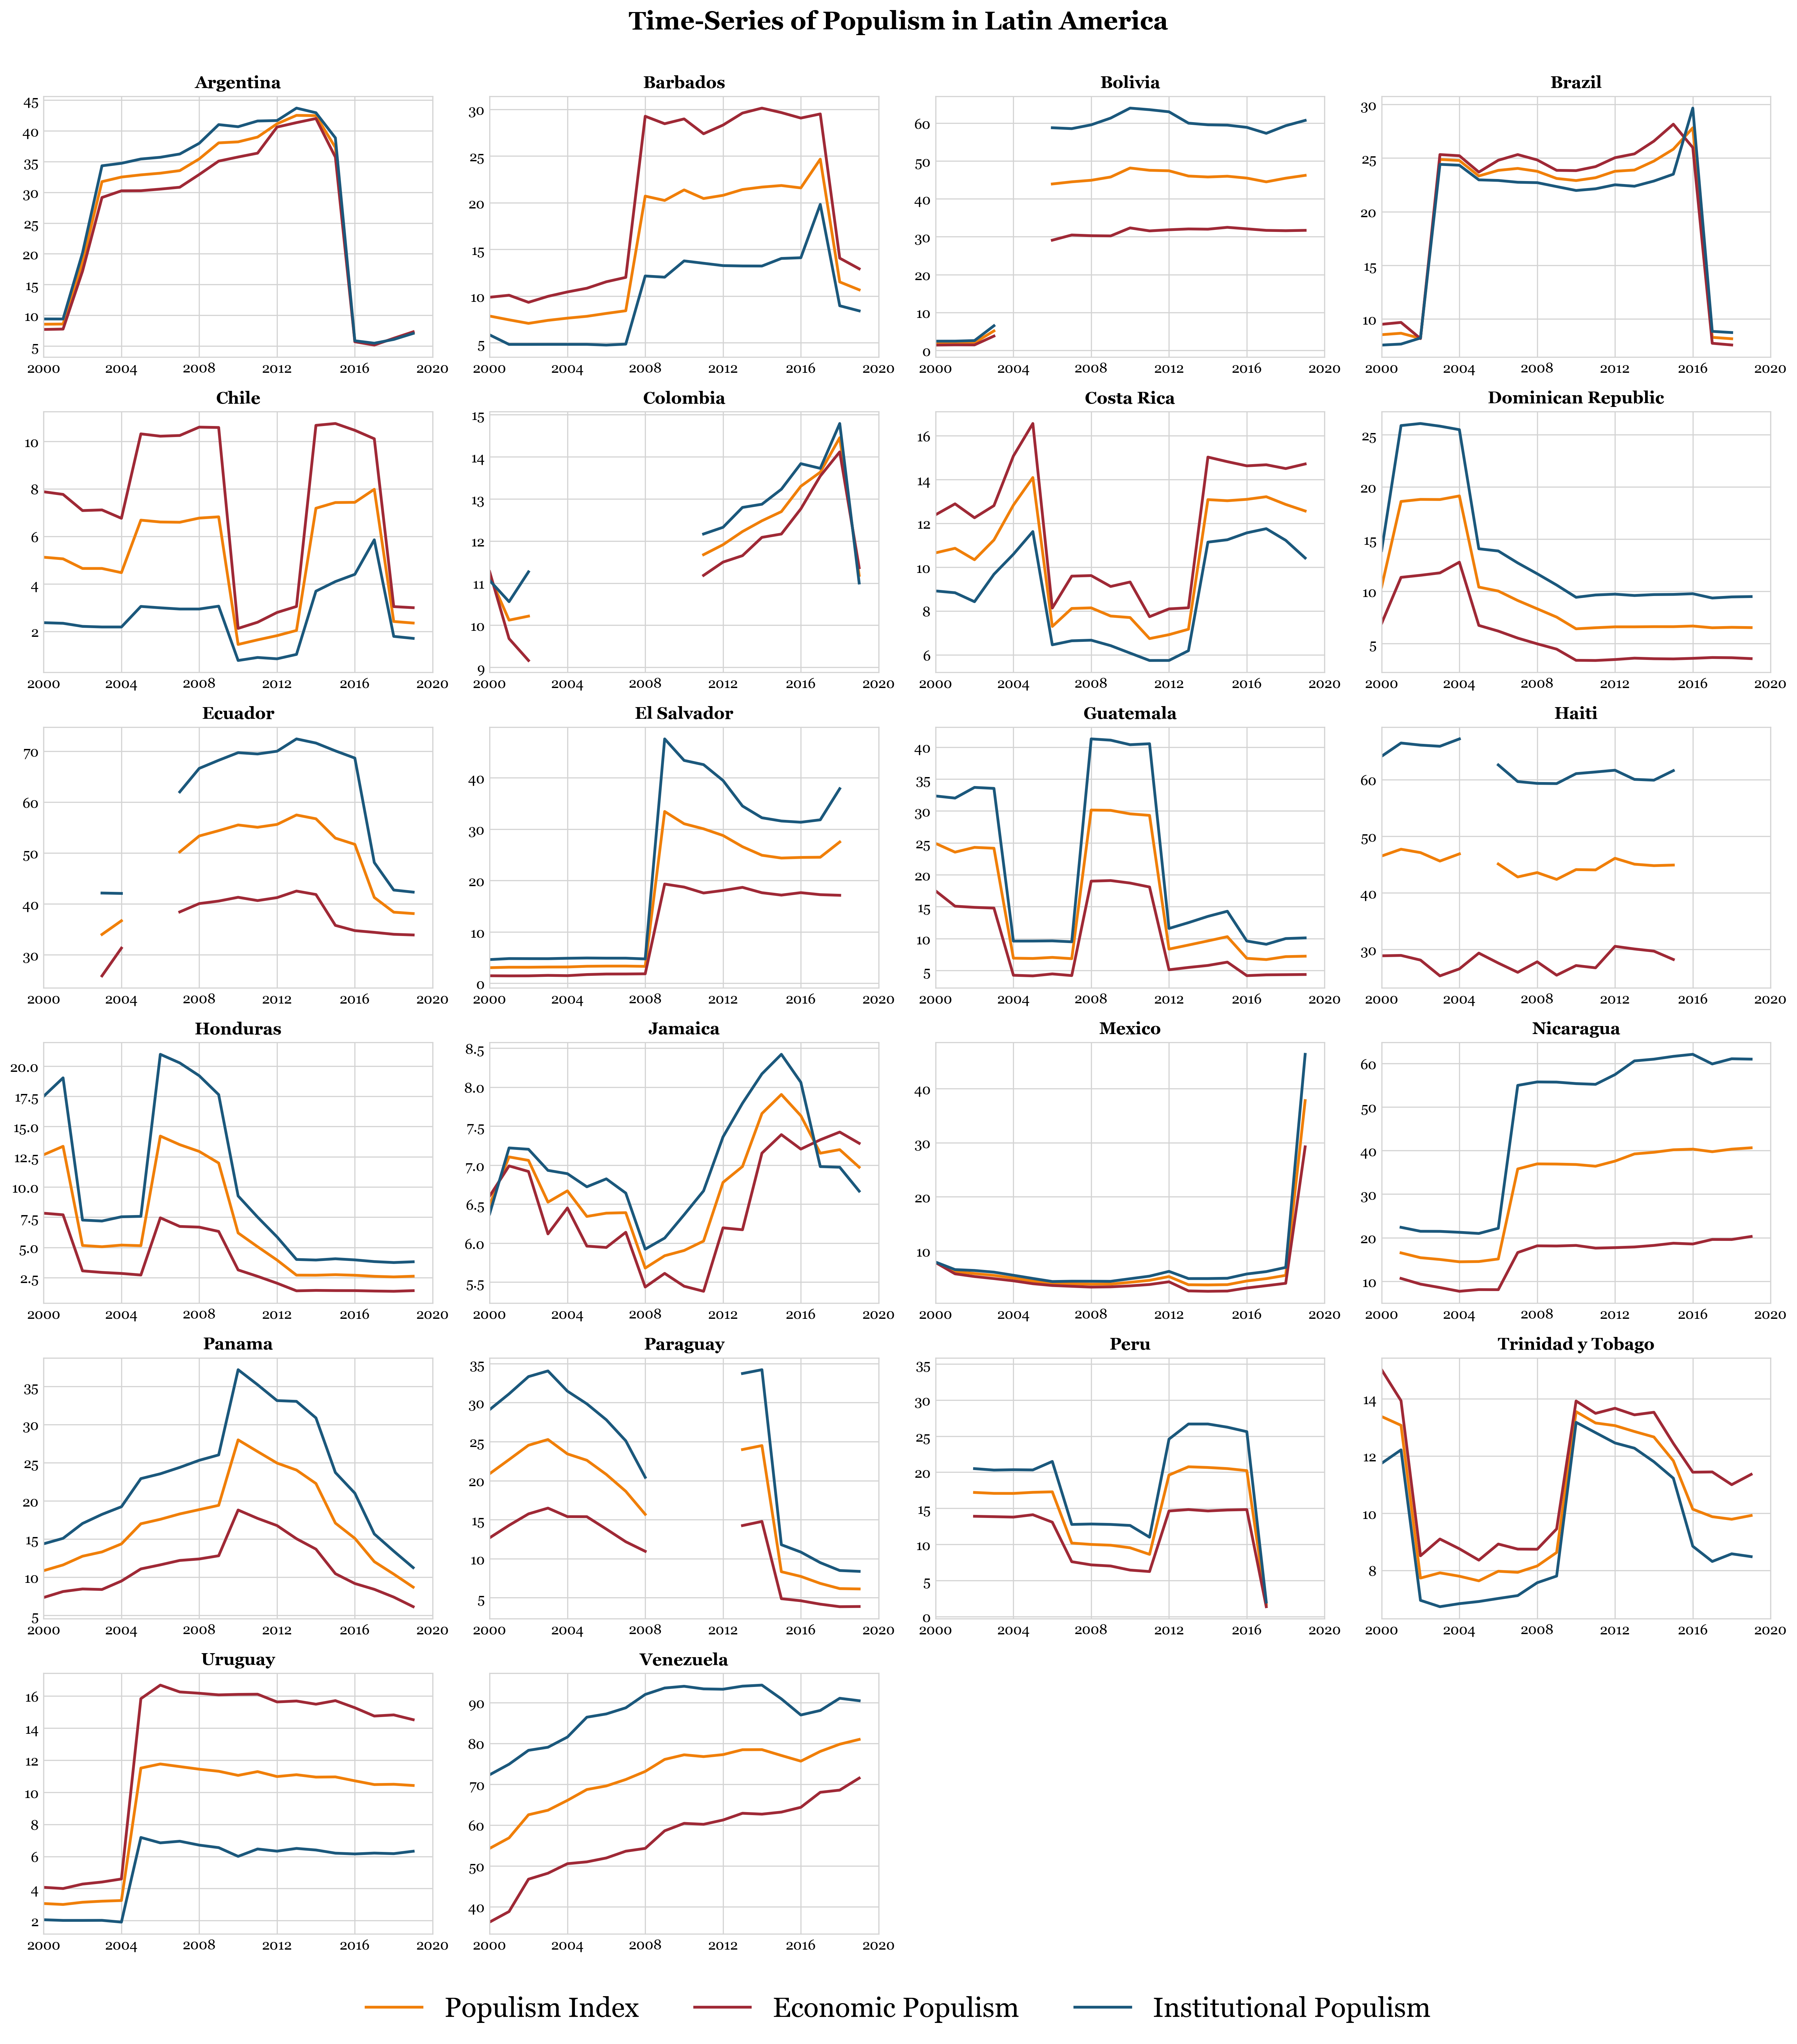

In [165]:
# %% TIME-SERIES: ALL COUNTRIES
import matplotlib.gridspec as gridspec

countries = INDEX['COUNTRY'].unique()
region    = INDEX['REGION'].unique()
years     = INDEX['YEAR'].unique()

# Setup figure and GridSpec
fig = plt.figure(figsize=(18, 20))
gs = gridspec.GridSpec(6, 4, height_ratios=[1, 1, 1, 1, 1, 1])  # 6 rows, 4 cols

# Prepare to capture legend handles from the first plot
legend_handles = None

# Loop over 22 countries
for i, country in enumerate(countries):
    if i < 20:
        row, col = divmod(i, 4)
    else:
        row = 5
        col = i - 20  # Only 2 subplots in last row (col=0, col=1)

    ax = fig.add_subplot(gs[row, col])
    
    country_data = INDEX[INDEX['COUNTRY'] == country].copy()
    country_data.sort_values('YEAR', inplace=True)

    T  = country_data['YEAR']
    P  = country_data['POP']
    EP = country_data['PEP']
    IP = country_data['PIP']
    
    line1, = ax.plot(T, P , label='Populism Index')
    line2, = ax.plot(T, EP, label='Economic Populism')
    line3, = ax.plot(T, IP, label='Institutional Populism')
    
    ax.set_title(country, fontweight='bold')
    ax.set_xlim(2000, 2020)
    ax.set_xticks(np.arange(2000, 2022, 4))
    
    # Store legend handles only once (from first subplot)
    if legend_handles is None:
        legend_handles = [line1, line2, line3]

# Add shared legend at the bottom center
fig.legend(
    handles=legend_handles,
    loc='lower center',
    ncol=3,
    fontsize=20,  # or 'x-large', or a number like 14
    frameon=False,
    bbox_to_anchor=(0.5, -0.01)  # push it down a little more
)

fig.suptitle("Time-Series of Populism in Latin America", fontsize=18, fontweight='bold', y=1.005)

plt.tight_layout(rect=[0, 0.03, 1, 1])  # leave space for legend
plt.show()


## Time Series: Latin America and Sub-Regions Averages

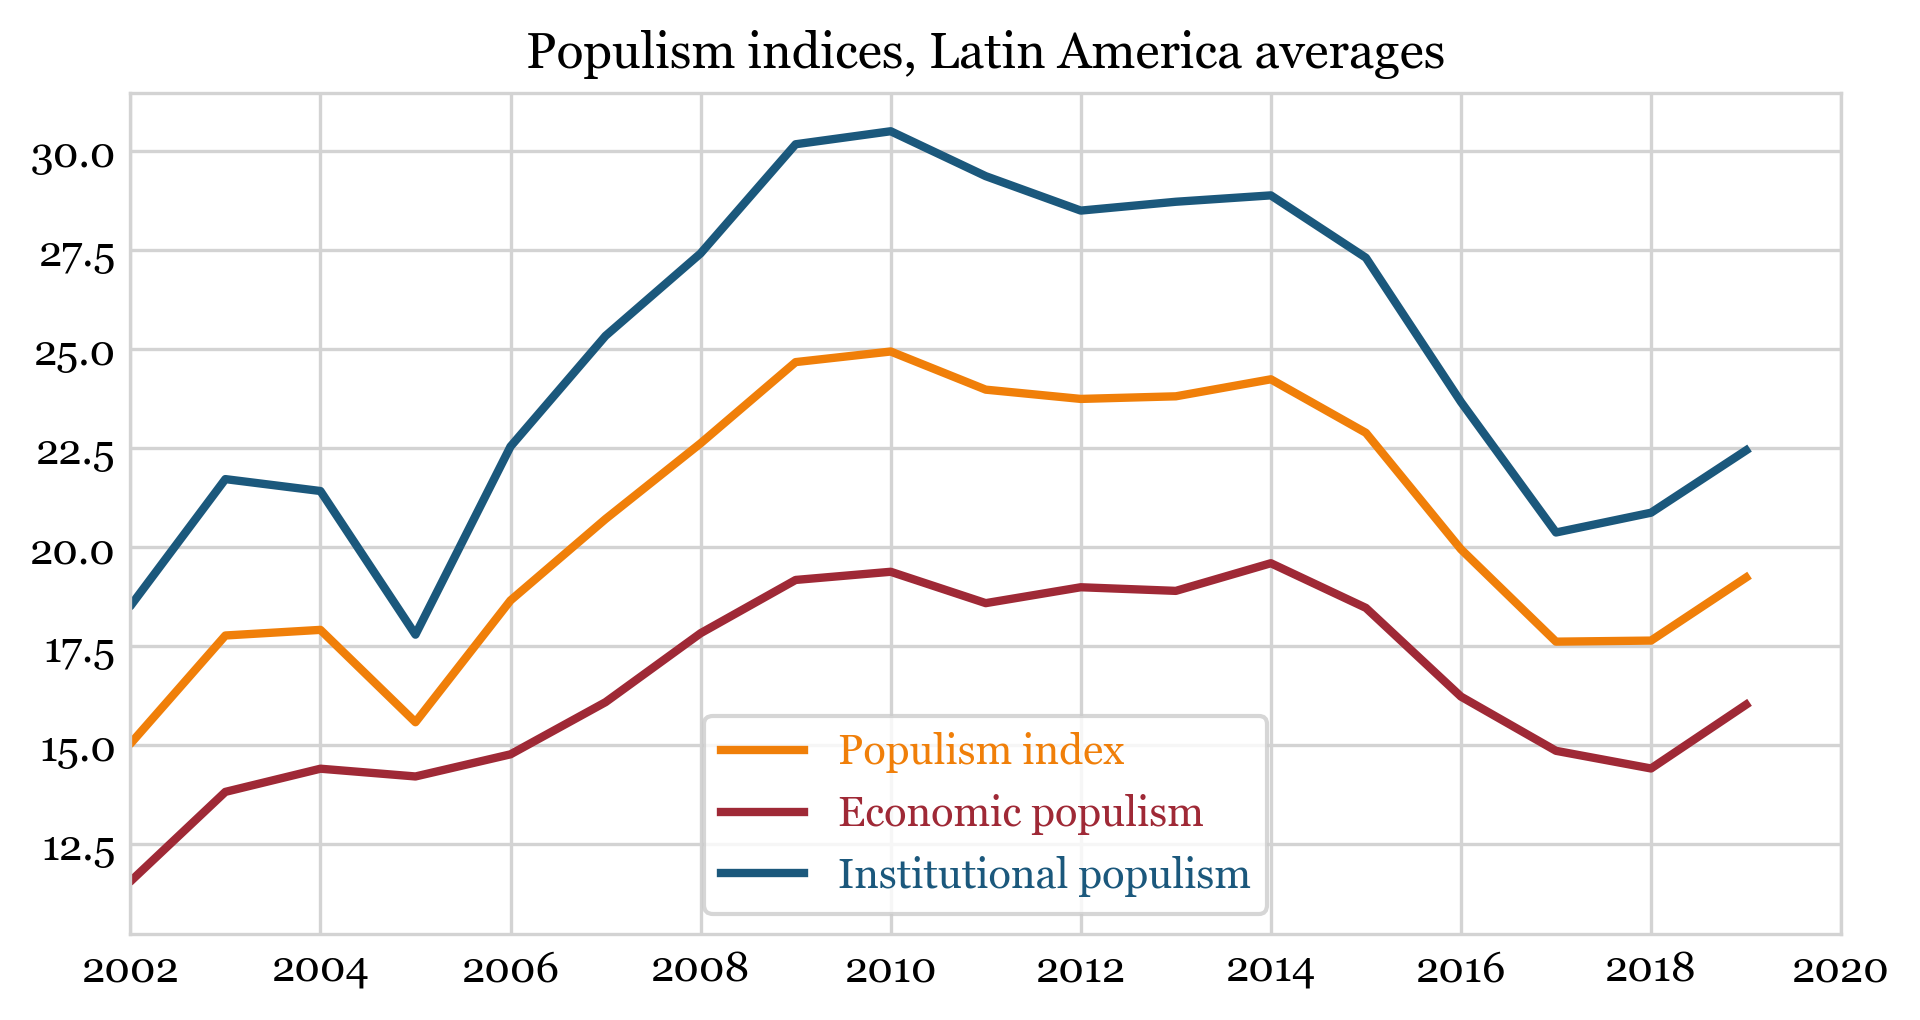

In [166]:
# %% TIME-SERIES: LATAM AND SUB-REGIONS

#### Create average series and labels
POP = INDEX.groupby('YEAR')['POP'].mean().reset_index()
PEP = INDEX.groupby('YEAR')['PEP'].mean().reset_index()
PIP = INDEX.groupby('YEAR')['PIP'].mean().reset_index()

T  = POP['YEAR']
y1 = POP['POP']
y2 = PEP['PEP']
y3 = PIP['PIP']

labels = ['Populism index'   ,
          'Economic populism',
          'Institutional populism']

#### Average: Latin-America
fig, ax = plt.subplots(figsize=fig_word)
plt.title("Populism indices, Latin America averages")
plt.plot(T, y1, label=labels[0])
plt.plot(T, y2, label=labels[1])
plt.plot(T, y3, label=labels[2])
plt.xlim(2002, 2020)
plt.legend(labelcolor='linecolor')
plt.tight_layout()
plt.show()

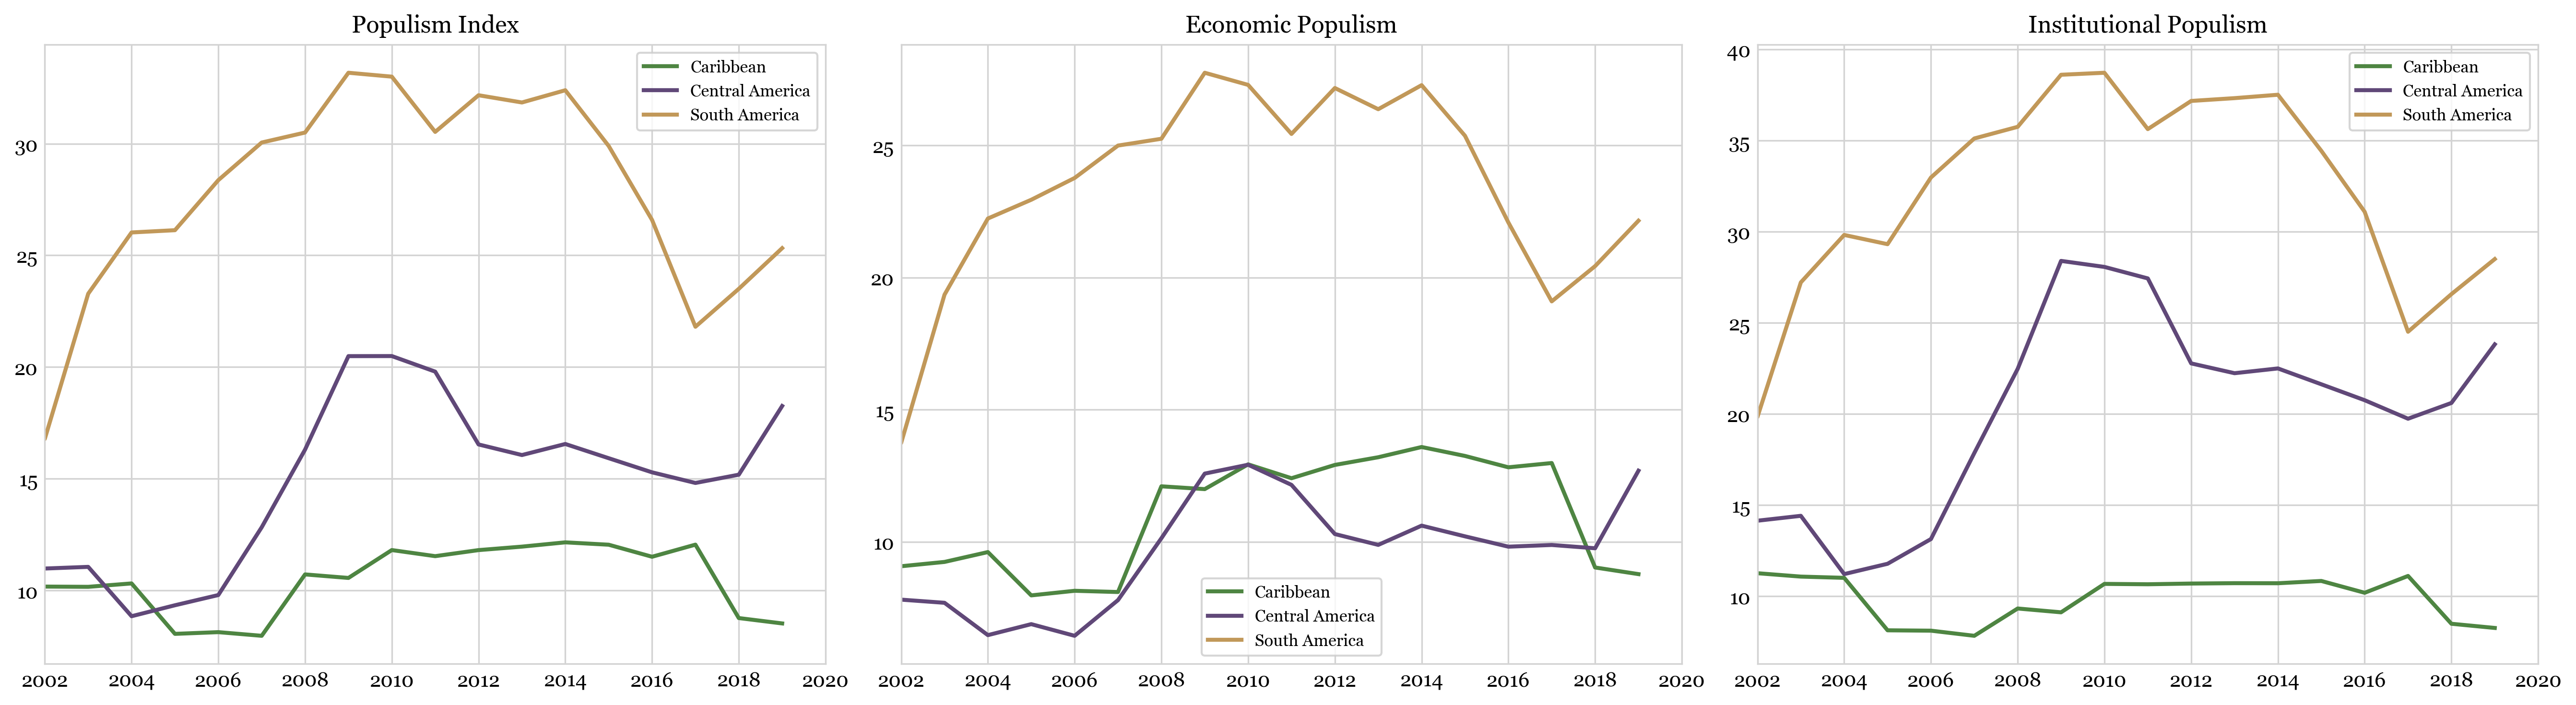

In [167]:
# Prepare data
P  = INDEX.pivot_table(index='YEAR', columns='REGION', values='POP', aggfunc='mean')
EP = INDEX.pivot_table(index='YEAR', columns='REGION', values='PEP', aggfunc='mean')
IP = INDEX.pivot_table(index='YEAR', columns='REGION', values='PIP', aggfunc='mean')

P['T']  = EP['T'] = IP['T'] = np.arange(2000, 2020, 1)
T = P['T']

# Extract series
P1, P2, P3   = P['Caribbean'], P['Central America'], P['South America']
EP1, EP2, EP3 = EP['Caribbean'], EP['Central America'], EP['South America']
IP1, IP2, IP3 = IP['Caribbean'], IP['Central America'], IP['South America']

# Set up the 1x3 layout
fig, axes = plt.subplots(1, 3, figsize=(18, 5), sharex=True)

# --- Panel 1: Populism Index ---
axes[0].plot(T, P1, label='Caribbean'      , c='C3')
axes[0].plot(T, P2, label='Central America', c='C4')
axes[0].plot(T, P3, label='South America'  , c='C5')
axes[0].set_title("Populism Index")
axes[0].set_xlim(2002, 2020)
axes[0].legend(fontsize='small')

# --- Panel 2: Economic Populism ---
axes[1].plot(T, EP1, label='Caribbean'      , c='C3')
axes[1].plot(T, EP2, label='Central America', c='C4')
axes[1].plot(T, EP3, label='South America'  , c='C5')
axes[1].set_title("Economic Populism")
axes[1].set_xlim(2002, 2020)
axes[1].legend(fontsize='small', loc='lower center', ncol=1)

# --- Panel 3: Institutional Populism ---
axes[2].plot(T, IP1, label='Caribbean'      , c='C3')
axes[2].plot(T, IP2, label='Central America', c='C4')
axes[2].plot(T, IP3, label='South America'  , c='C5')
axes[2].set_title("Institutional Populism")
axes[2].set_xlim(2002, 2020)
axes[2].legend(fontsize='small')

# Final layout adjustments
plt.tight_layout()
plt.savefig('visualizations/TS_Regional_Combined')
plt.show()

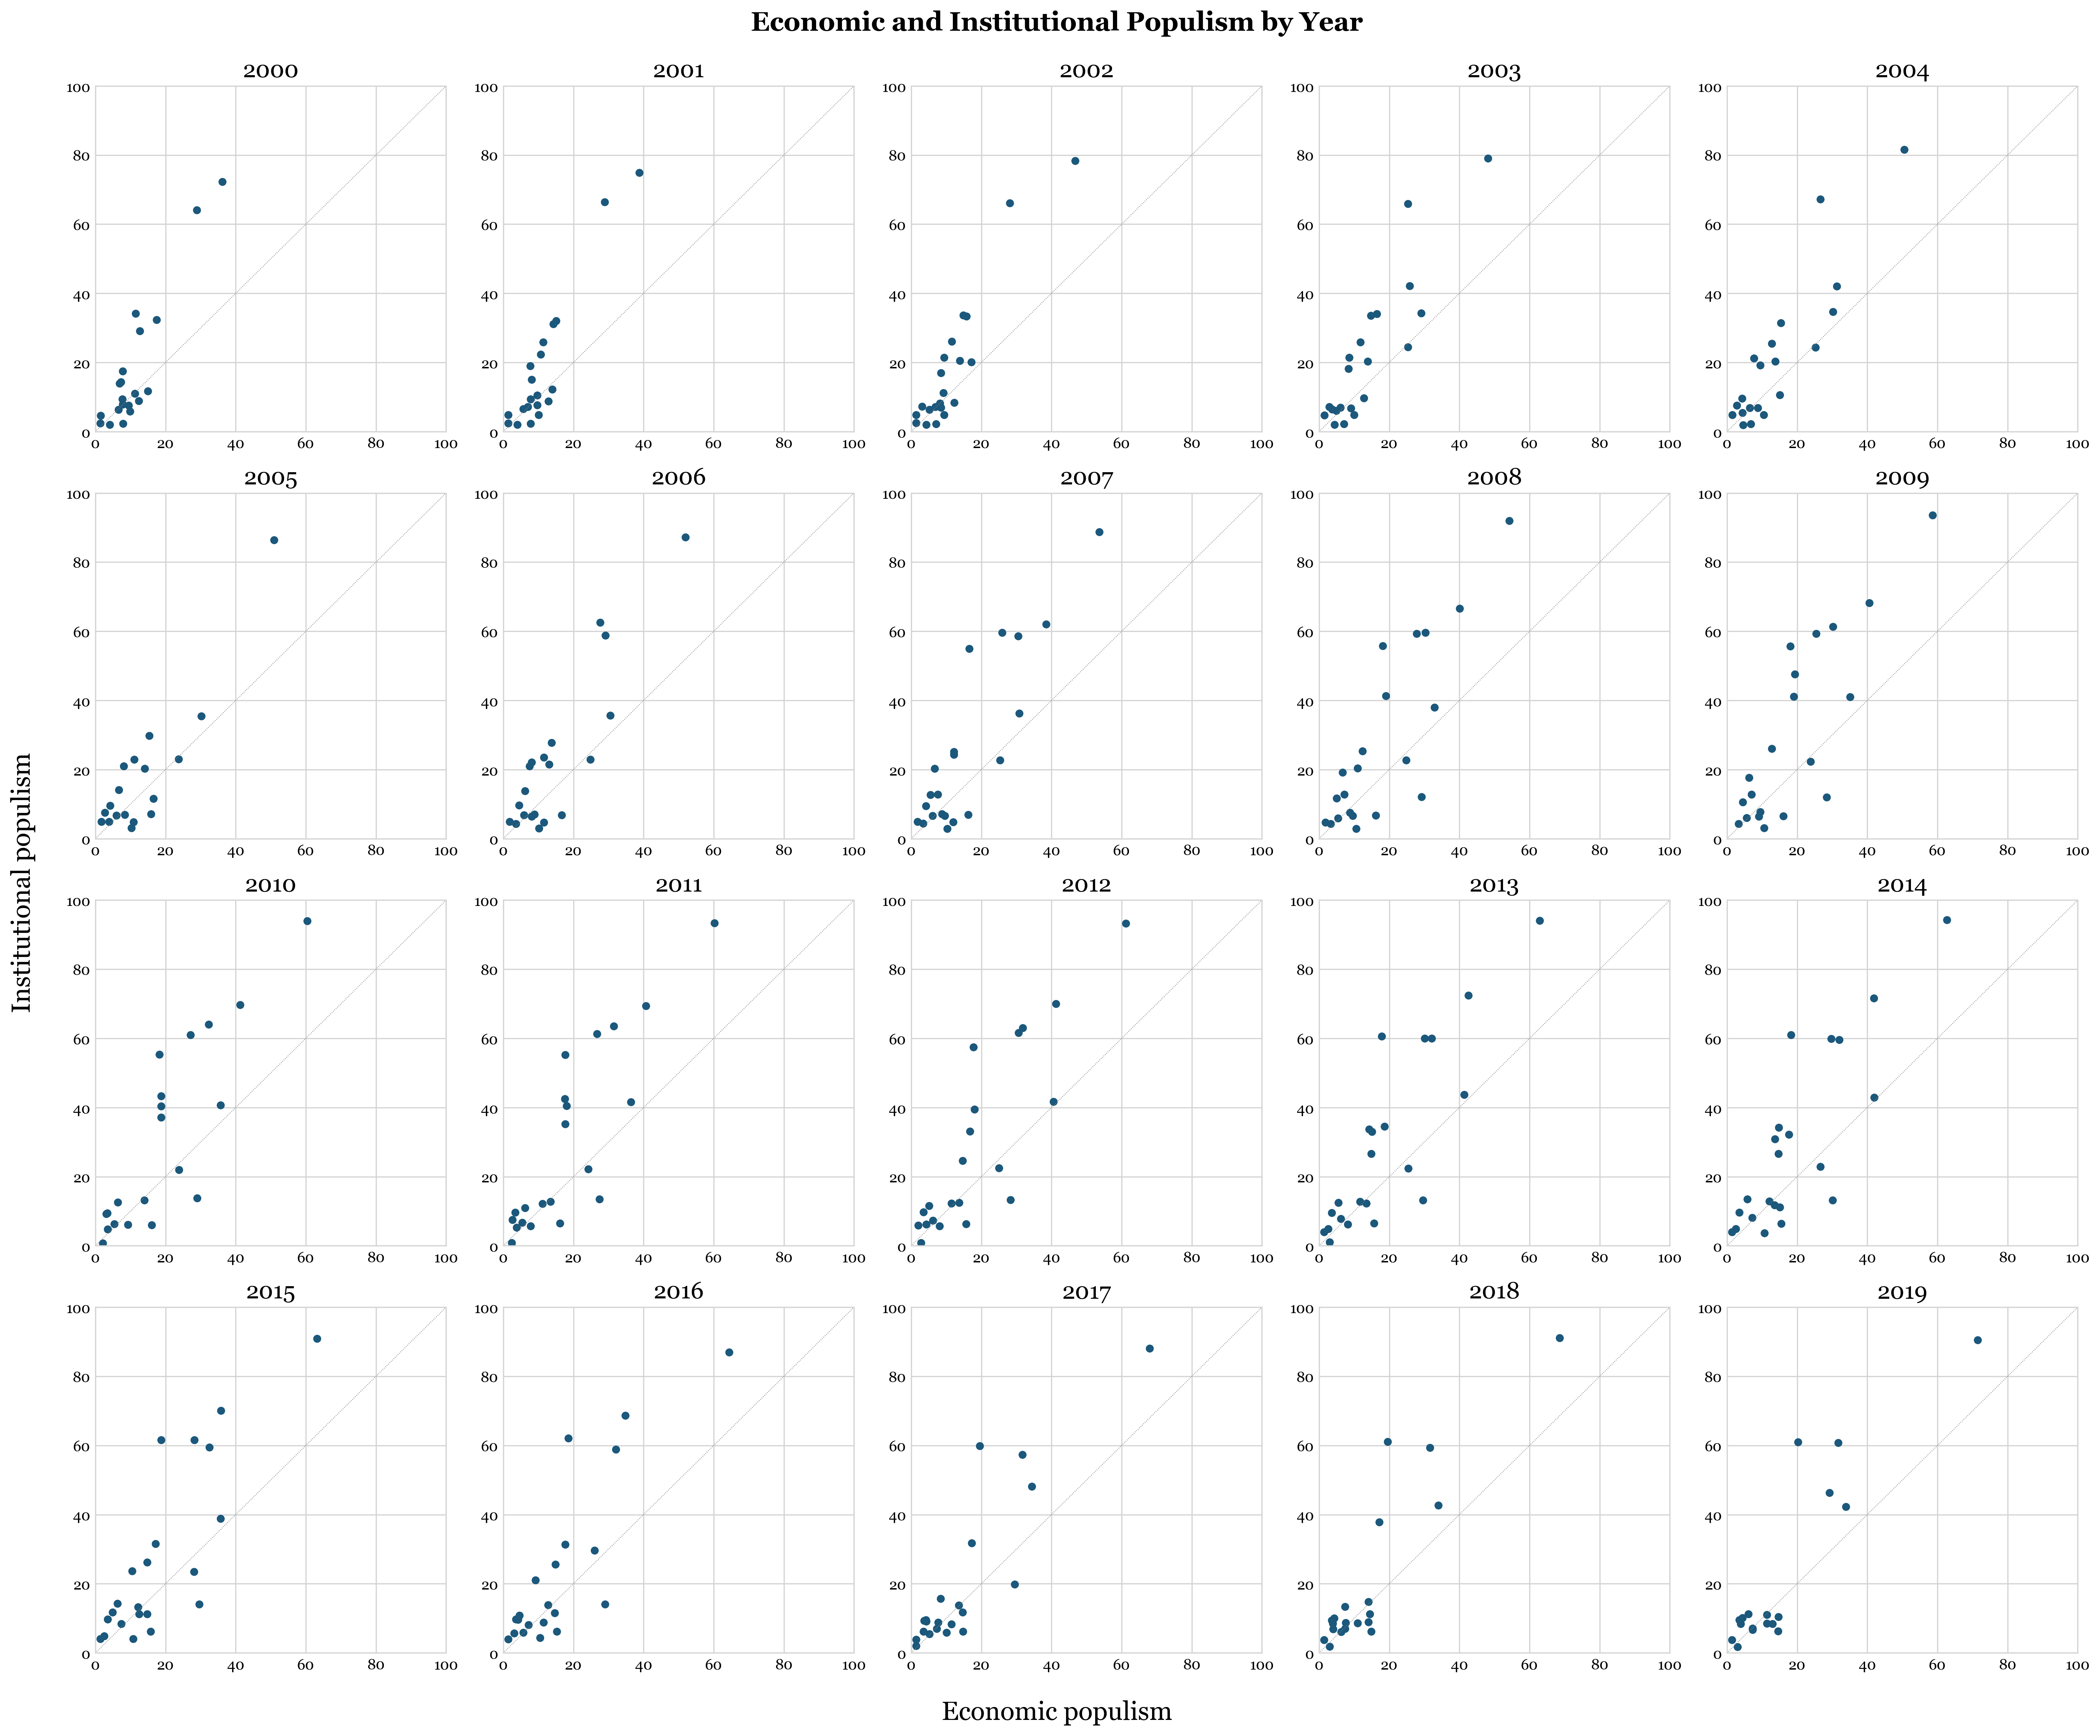

In [168]:
fig, axes = plt.subplots(4, 5, figsize=(20, 16))
axes = axes.flatten()
axis_range = [0, 100, 0, 100]

for idx, year in enumerate(sorted(years[:20])):
    ax = axes[idx]
    year_data = INDEX[INDEX['YEAR'] == year]
    ax.scatter(year_data['PEP'], year_data['PIP'], color='C2', s=20)
    ax.plot([0, 100], [0, 100], color='gray', ls=':', lw=0.5)
    ax.set_xlim(axis_range[0], axis_range[1])
    ax.set_ylim(axis_range[2], axis_range[3])
    ax.set_title(str(year), fontsize=16)

plt.tight_layout(rect=[0.02, 0.02, 1, 1])
fig.suptitle("Economic and Institutional Populism by Year", fontsize=18, fontweight='bold', y=1.02)
fig.text(0.5, 0.001, 'Economic populism', ha='center', fontsize=18)
fig.text(0.001, 0.5, 'Institutional populism', va='center', rotation='vertical', fontsize=18)
plt.show()



## The "Iconic Five"

### Transitions

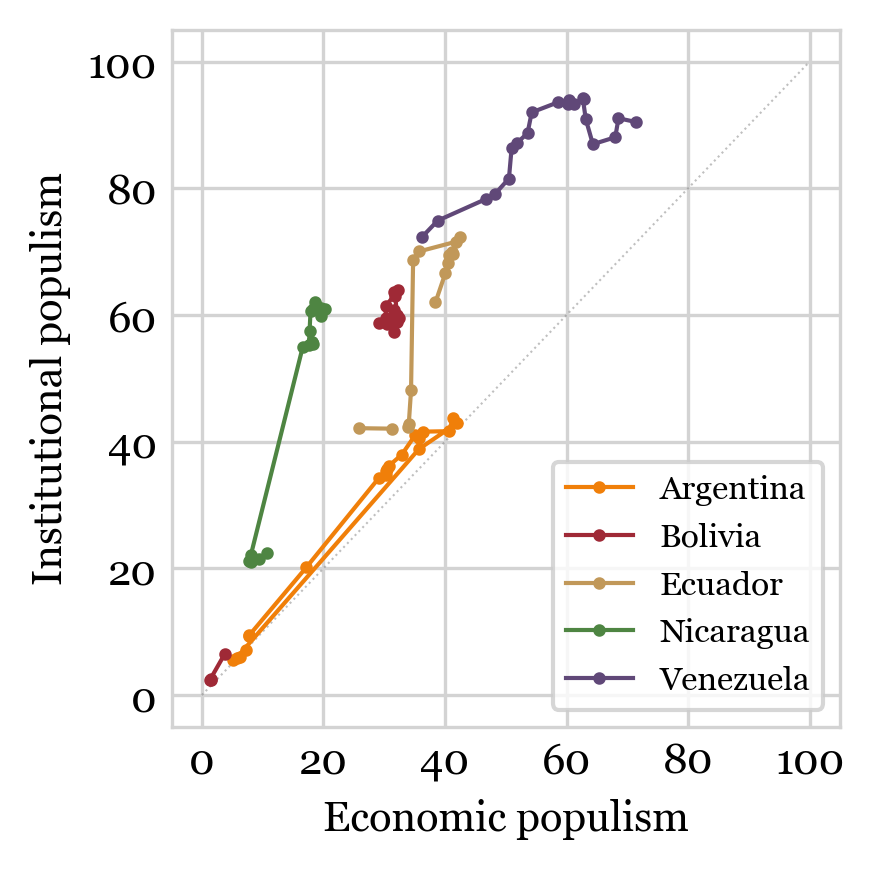

In [169]:
#### Transition
ARG = INDEX[INDEX['ISO3'] == "ARG"]
BOL = INDEX[INDEX['ISO3'] == "BOL"]
ECU = INDEX[INDEX['ISO3'] == "ECU"]
NIC = INDEX[INDEX['ISO3'] == "NIC"]
VEN = INDEX[INDEX['ISO3'] == "VEN"]


axis_range = [0, 100, 0, 100]
LABELS=['Argentina', 'Bolivia', 'Ecuador', 'Nicaragua', 'Venezuela']
TITLE = "Populism transition"

fig, ax = plt.subplots(figsize=fig_square)
plt.plot([0,100],[0,100], color='gray', linewidth=0.5, ls=':', alpha=0.5)
plt.plot(ARG['PEP'],ARG['PIP'],'o-',lw=1, ms=2,color='C0',label=LABELS[0])
plt.plot(BOL['PEP'],BOL['PIP'],'o-',lw=1, ms=2,color='C1',label=LABELS[1])
plt.plot(ECU['PEP'],ECU['PIP'],'o-',lw=1, ms=2,color='C5',label=LABELS[2])
plt.plot(NIC['PEP'],NIC['PIP'],'o-',lw=1, ms=2,color='C3' ,label=LABELS[3])
plt.plot(VEN['PEP'],VEN['PIP'],'o-',lw=1, ms=2,color='C4',label=LABELS[4])
plt.xlabel("Economic populism")
plt.ylabel("Institutional populism")
plt.axis_range=axis_range
plt.xticks(np.arange(0, 101, 20))
plt.legend(fontsize=8)
plt.tight_layout()
plt.show()


### Time Series

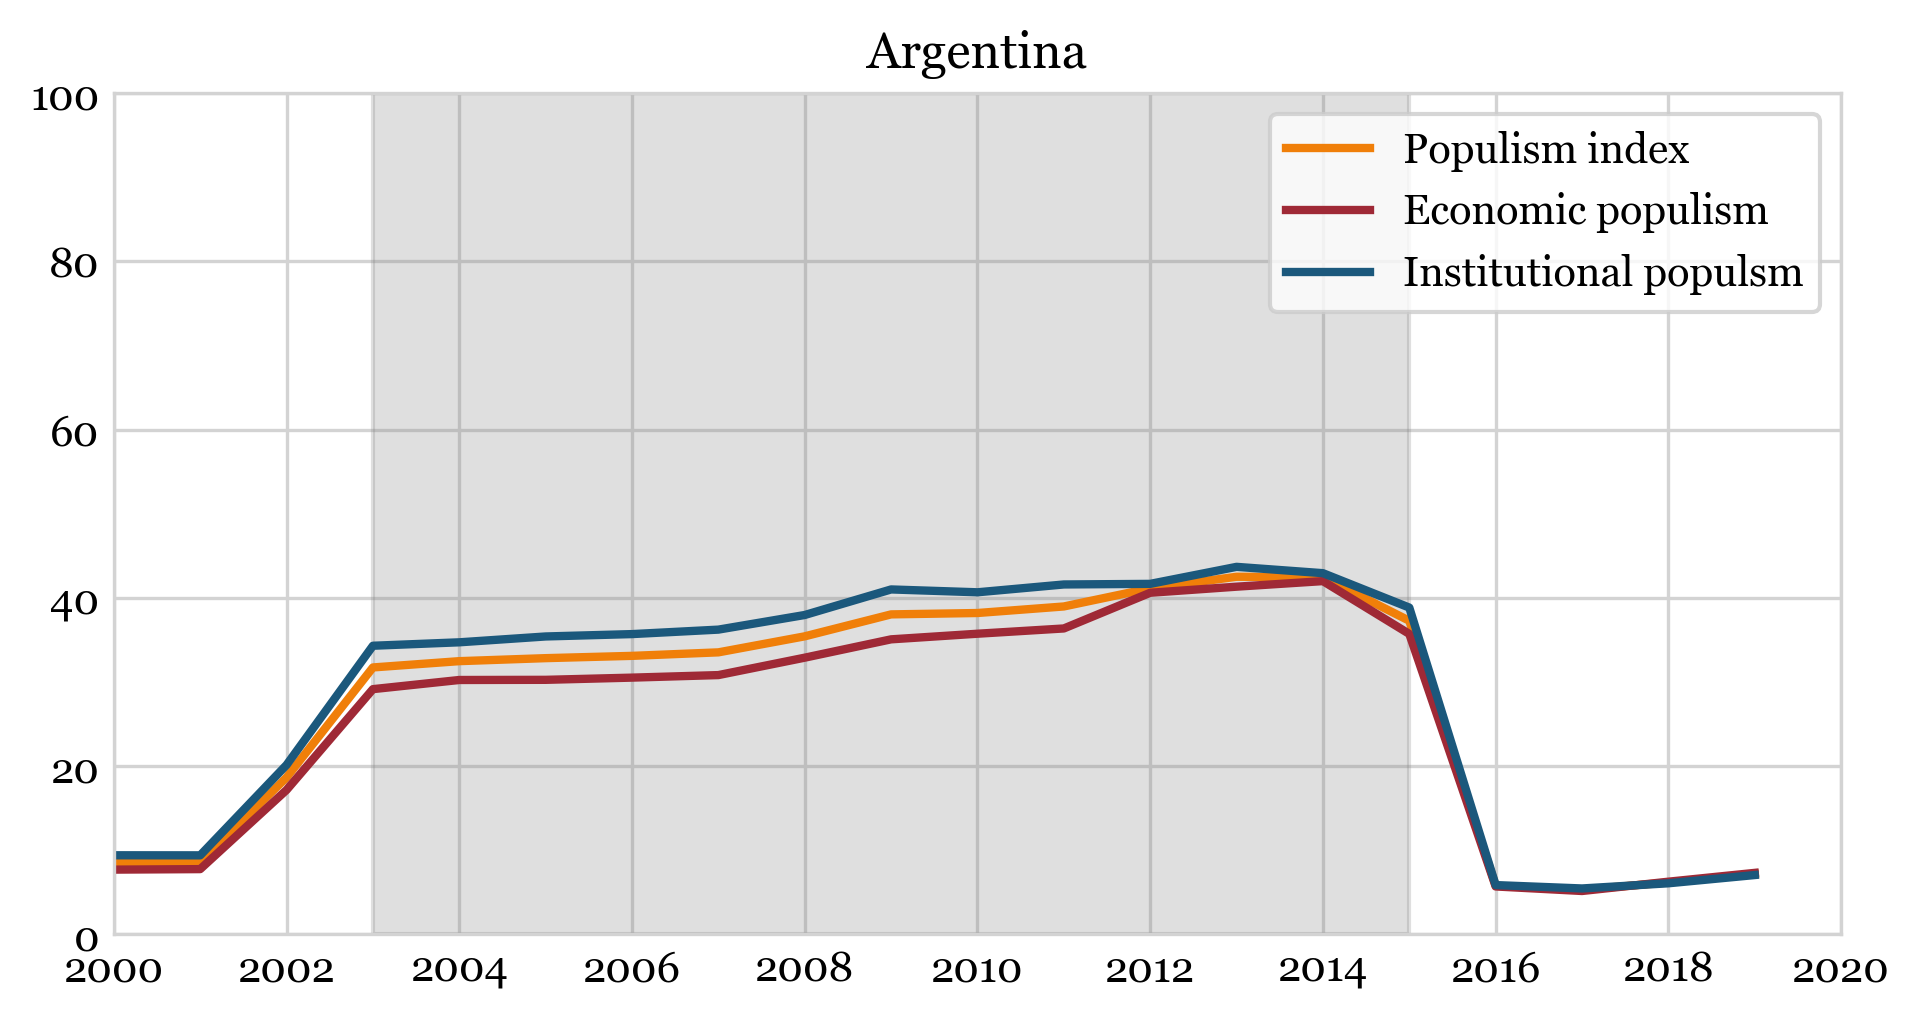

In [170]:
#### Argentina
y  = INDEX[INDEX['ISO3']=='ARG']
y1 = y['POP']
y2 = y['PEP']
y3 = y['PIP']
t  = y['YEAR']

fig, ax = plt.subplots(figsize=fig_word)
plt.title("Argentina")
plt.plot(t, y1, label='Populism index'       , color="C0")
plt.plot(t, y2, label='Economic populism'    , color="C1")
plt.plot(t, y3, label='Institutional populsm', color="C2")
ax.axvspan(2003, 2015, color='gray', alpha=0.25)
plt.ylim(0, 100)
plt.xlim(2000, 2020)
plt.xticks(np.arange(2000, 2022, 2))
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig('visualizations/Iconic5_ARG')
plt.show()

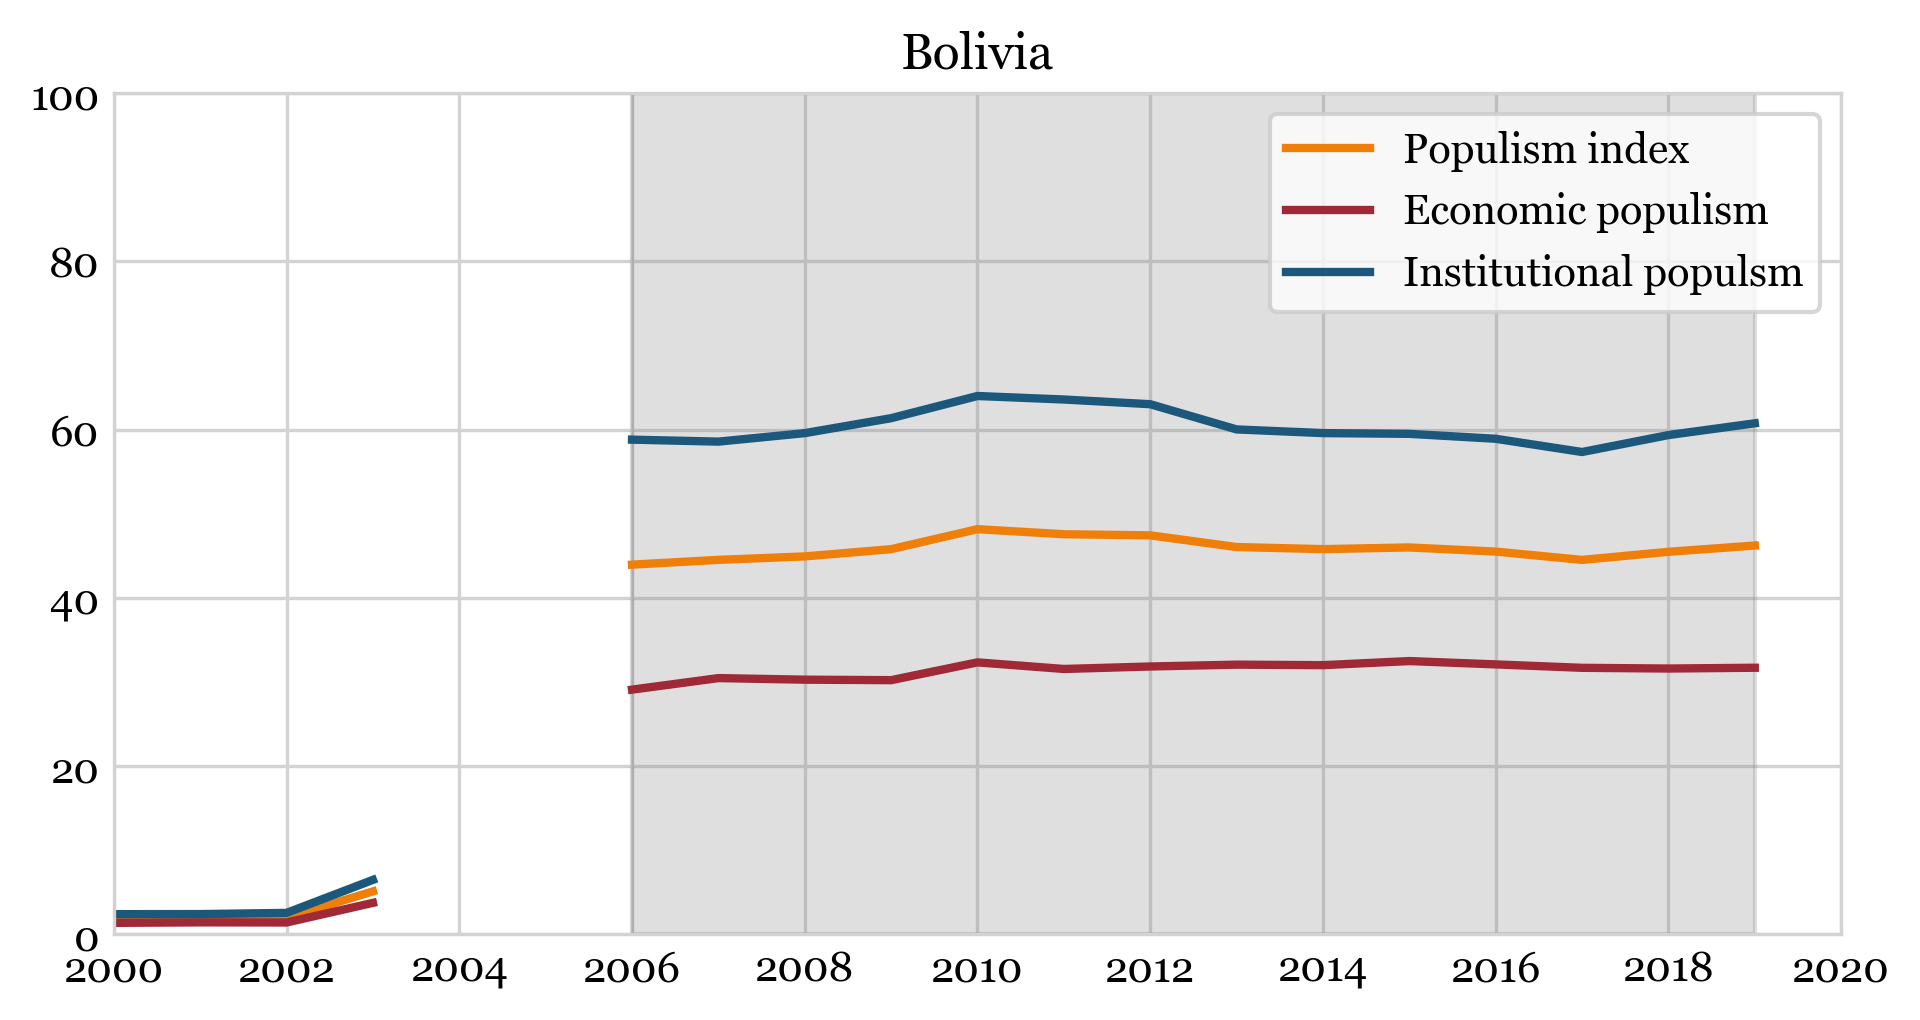

In [171]:
#### Bolivia
y  = INDEX[INDEX['ISO3']=='BOL']
y1 = y['POP']
y2 = y['PEP']
y3 = y['PIP']
t  = y['YEAR']

fig, ax = plt.subplots(figsize=fig_word)
plt.title("Bolivia")
plt.plot(t, y1, label='Populism index'       , color="C0")
plt.plot(t, y2, label='Economic populism'    , color="C1")
plt.plot(t, y3, label='Institutional populsm', color="C2")
ax.axvspan(2006, 2019, color='gray', alpha=0.25)
plt.ylim(0, 100)
plt.xlim(2000, 2020)
plt.xticks(np.arange(2000, 2022, 2))
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig('visualizations/Iconic5_BOL')
plt.show()

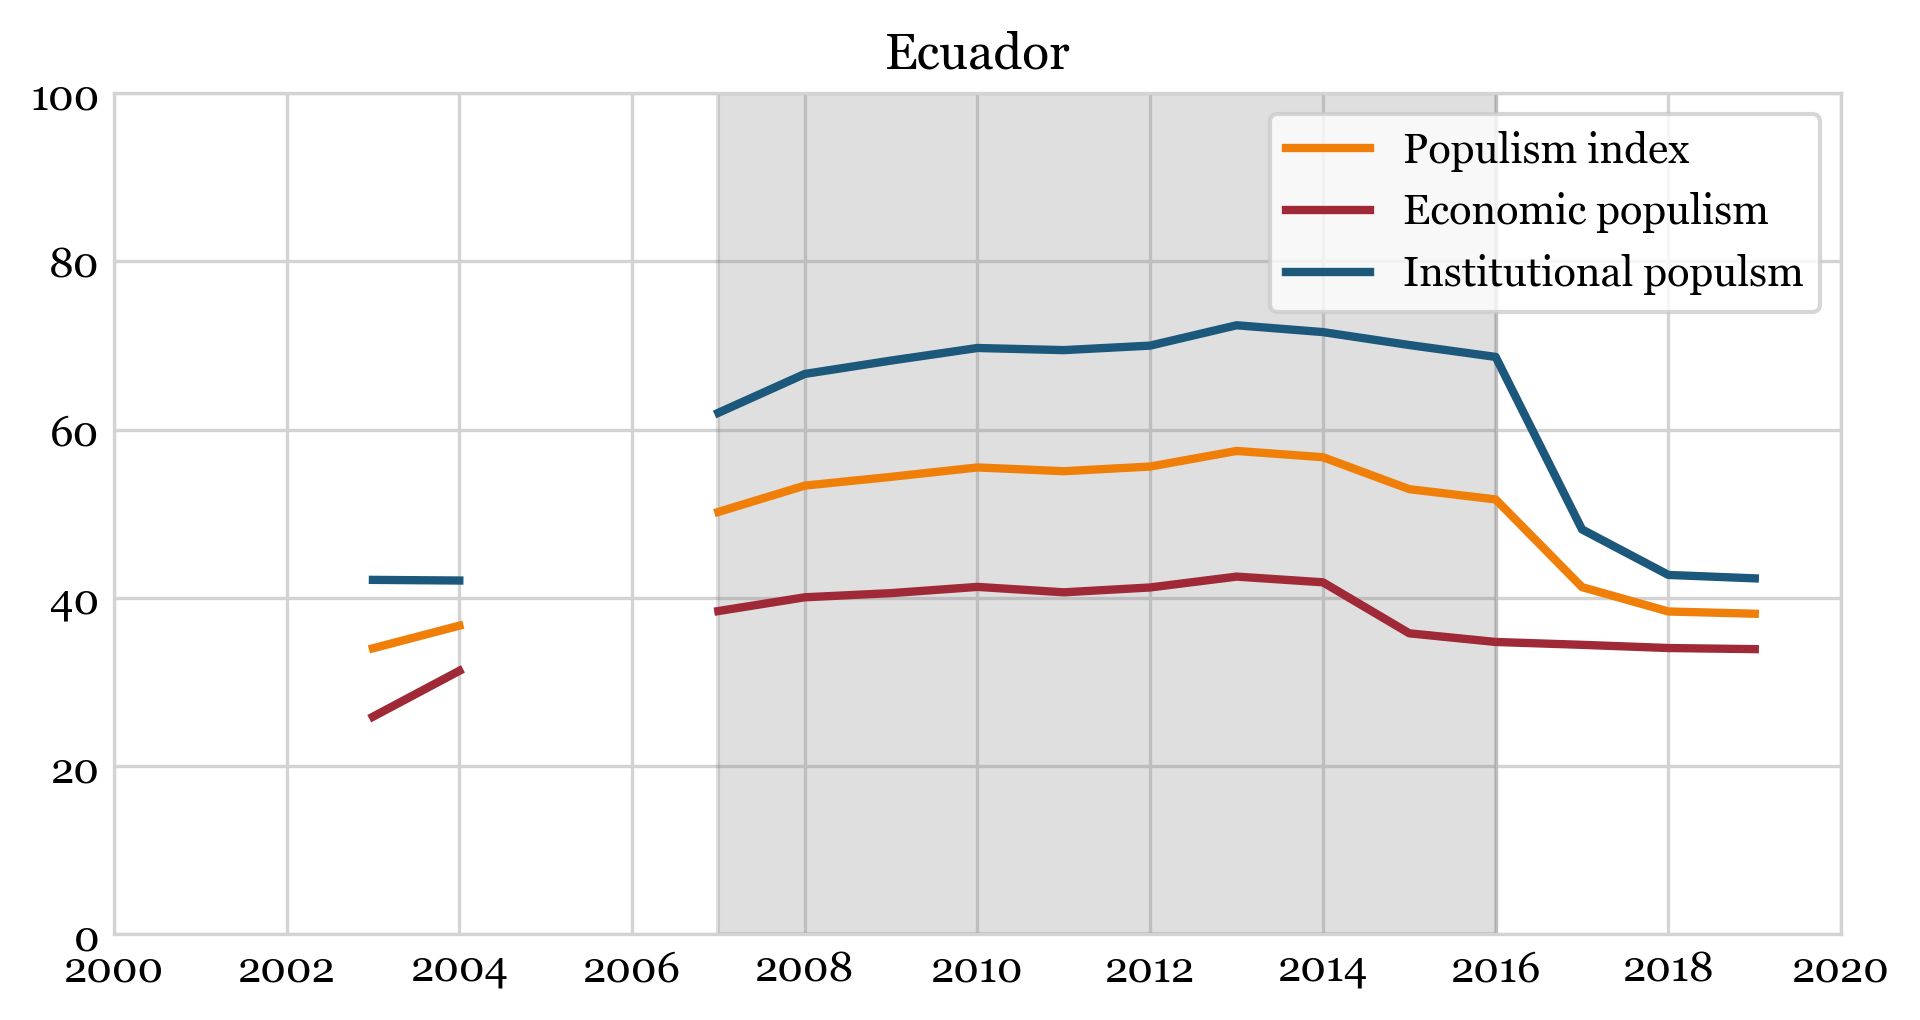

In [172]:
#### Ecuador
y  = INDEX[INDEX['ISO3']=='ECU']
y1 = y['POP']
y2 = y['PEP']
y3 = y['PIP']
t  = y['YEAR']

fig, ax = plt.subplots(figsize=fig_word)
plt.title("Ecuador")
plt.plot(t, y1, label='Populism index'       , color="C0")
plt.plot(t, y2, label='Economic populism'    , color="C1")
plt.plot(t, y3, label='Institutional populsm', color="C2")
ax.axvspan(2007, 2016, color='gray', alpha=0.25)
plt.ylim(0, 100)
plt.xlim(2000, 2020)
plt.xticks(np.arange(2000, 2022, 2))
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig('visualizations/Iconic5_ECU')
plt.show()

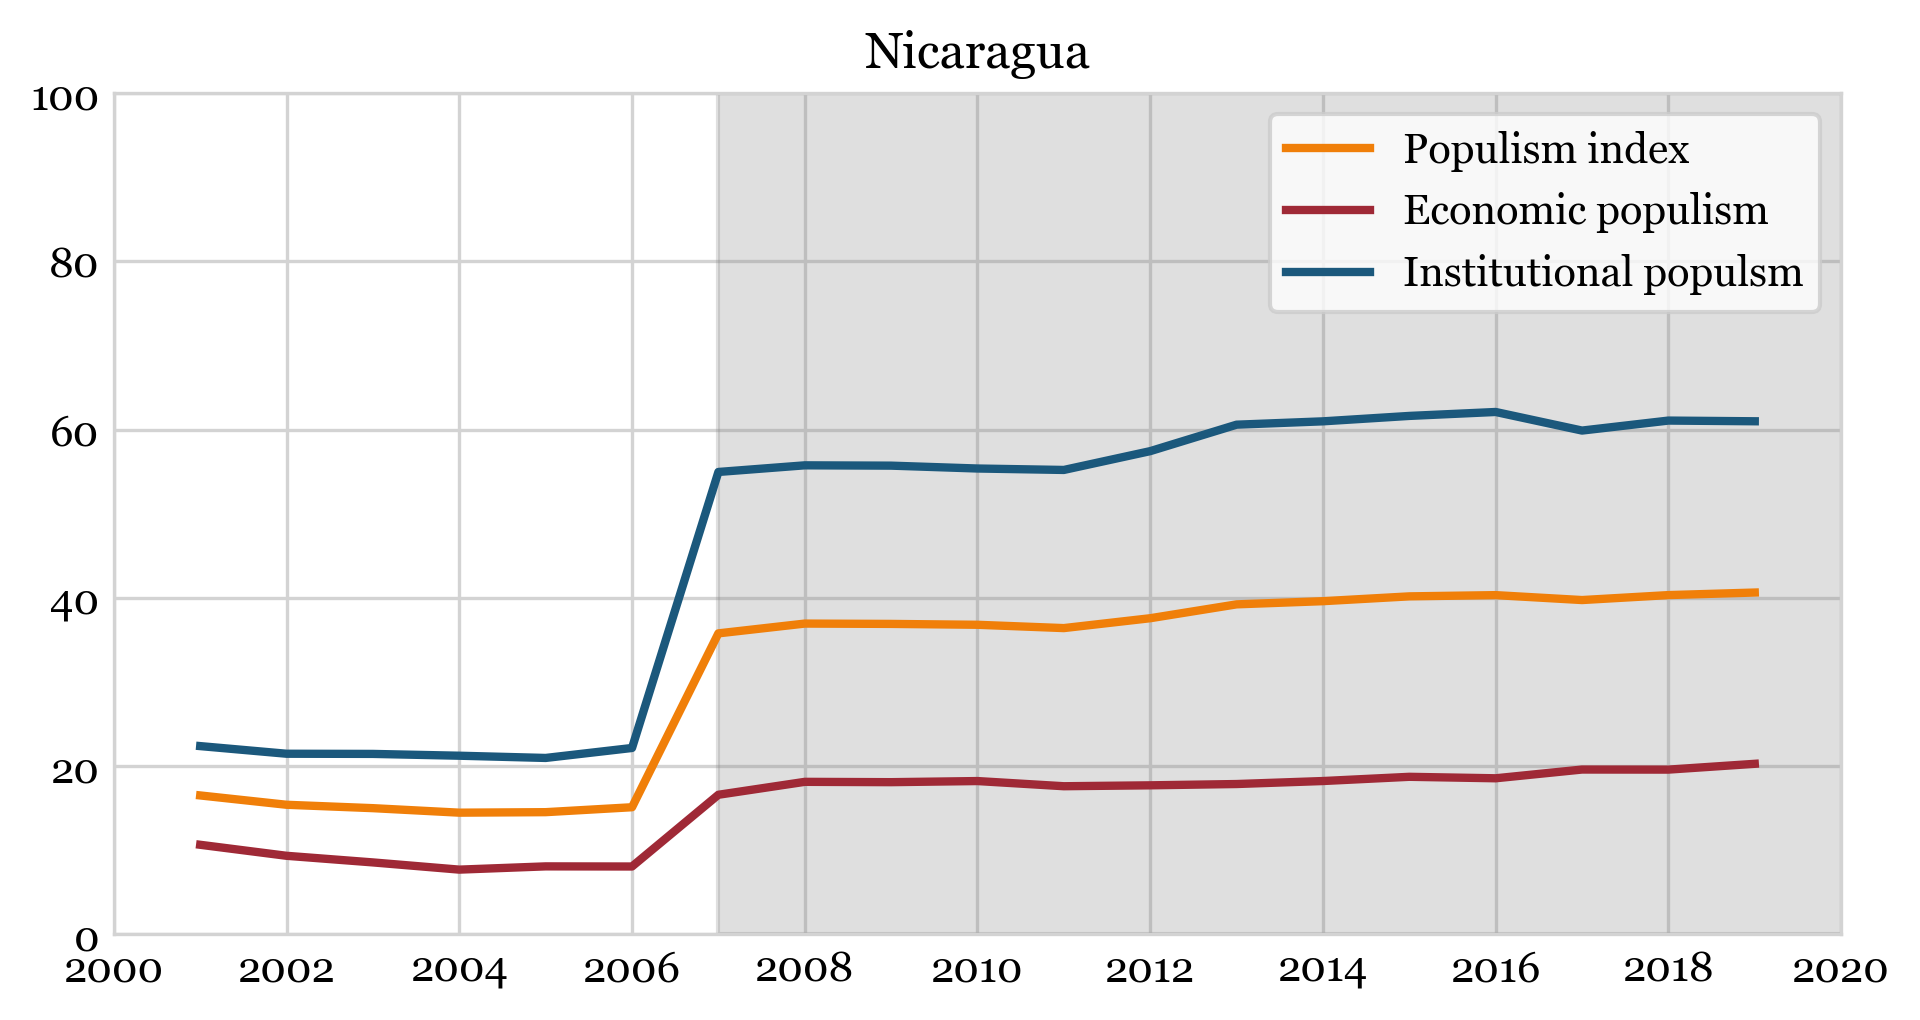

In [173]:
#### Nicaragua
y  = INDEX[INDEX['ISO3']=='NIC']
y1 = y['POP']
y2 = y['PEP']
y3 = y['PIP']
t  = y['YEAR']

fig, ax = plt.subplots(figsize=fig_word)
plt.title("Nicaragua")
plt.plot(t, y1, label='Populism index'       , color="C0")
plt.plot(t, y2, label='Economic populism'    , color="C1")
plt.plot(t, y3, label='Institutional populsm', color="C2")
ax.axvspan(2007, 2022, color='gray', alpha=0.25)
plt.ylim(0, 100)
plt.xlim(2000, 2020)
plt.xticks(np.arange(2000, 2022, 2))
plt.legend(loc="upper right")
plt.tight_layout()
plt.savefig('visualizations/Iconic5_NIC')
plt.show()

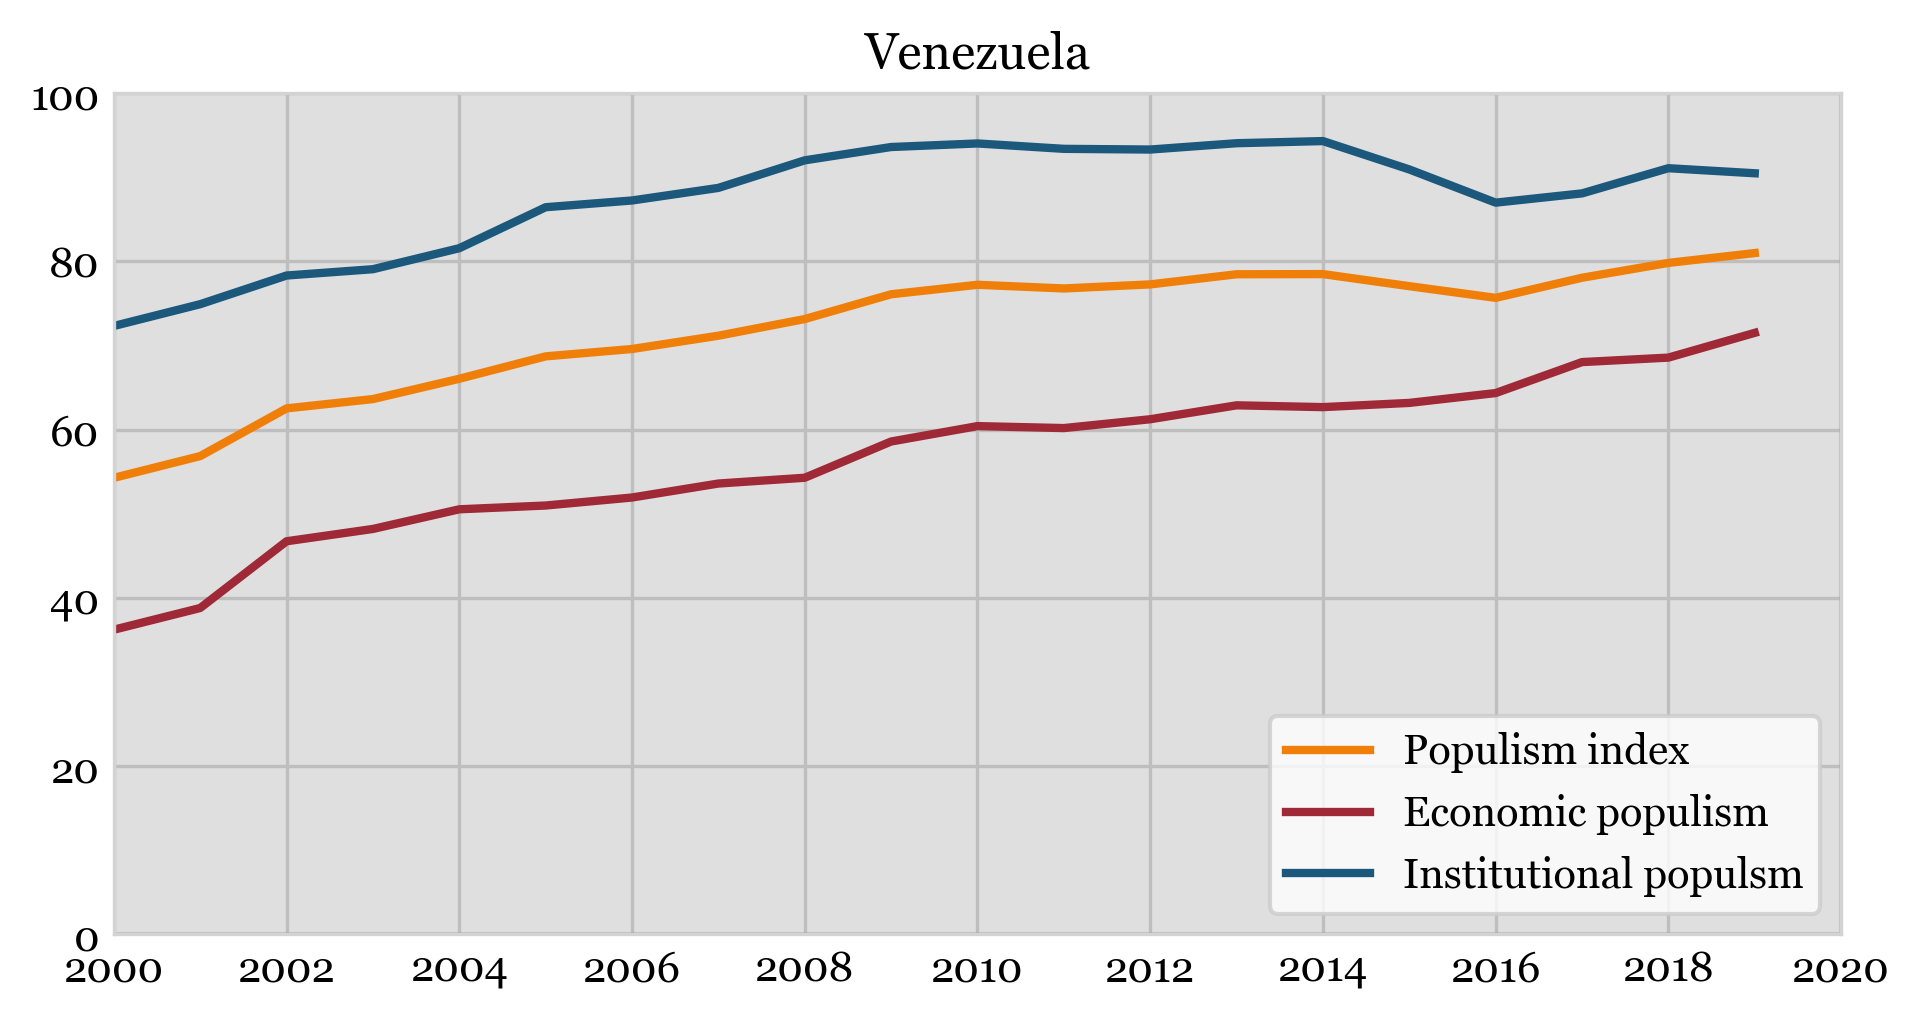

In [174]:
#### Venezuela
y  = INDEX[INDEX['ISO3']=='VEN']
y1 = y['POP']
y2 = y['PEP']
y3 = y['PIP']
t  = y['YEAR']

fig, ax = plt.subplots(figsize=fig_word)
plt.title("Venezuela")
plt.plot(t, y1, label='Populism index'       , color="C0")
plt.plot(t, y2, label='Economic populism'    , color="C1")
plt.plot(t, y3, label='Institutional populsm', color="C2")
ax.axvspan(1999, 2020, color='gray', alpha=0.25)
plt.ylim(0, 100)
plt.xlim(2000, 2020)
plt.xticks(np.arange(2000, 2022, 2))
plt.legend(loc='lower right')
plt.tight_layout()
plt.savefig('visualizations/Iconic5_VEN')
plt.show()

### Scatter Plots

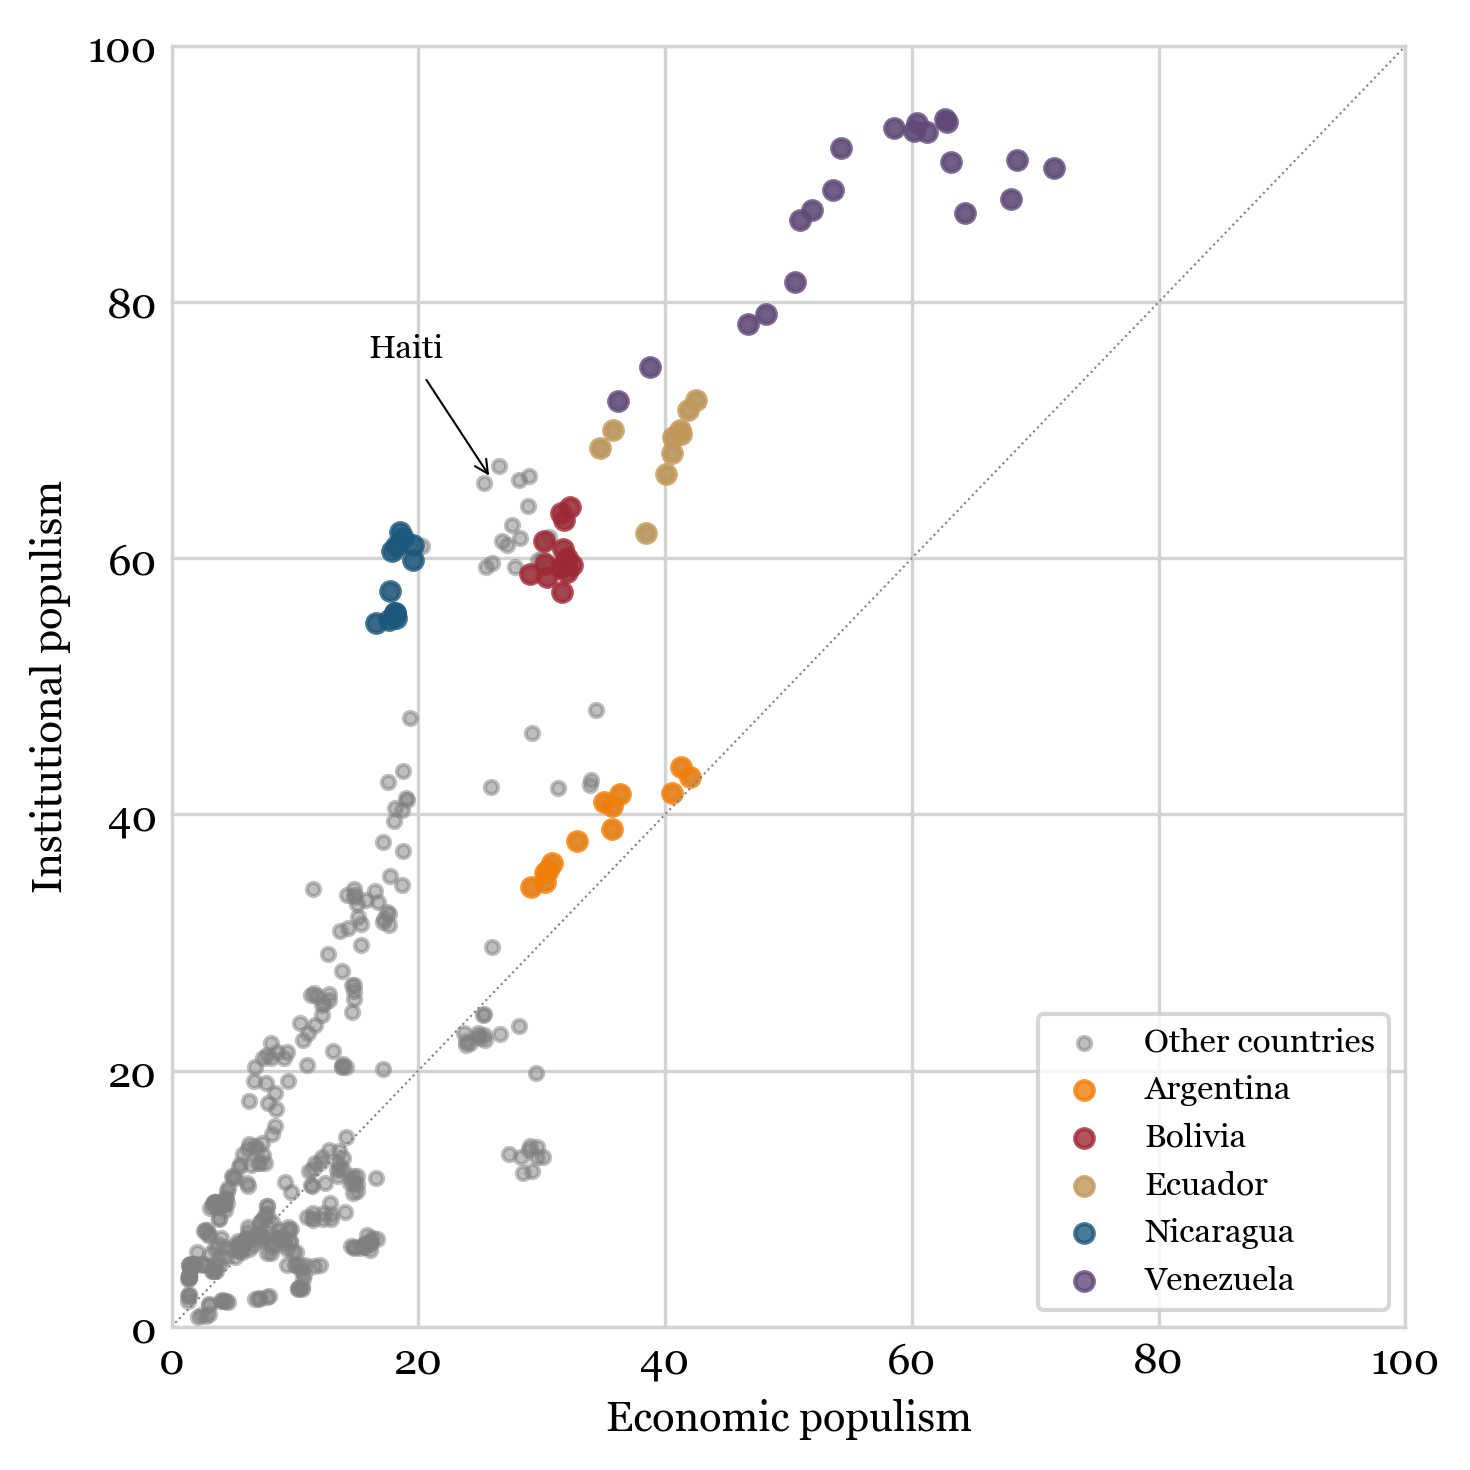

In [175]:
# Scatter Plots
ARG = INDEX[(INDEX['ISO3'] == "ARG") & (INDEX['YEAR'].between(2003, 2015))]
BOL = INDEX[(INDEX['ISO3'] == "BOL") & (INDEX['YEAR'].between(2006, 2019))]
ECU = INDEX[(INDEX['ISO3'] == "ECU") & (INDEX['YEAR'].between(2007, 2016))]
NIC = INDEX[(INDEX['ISO3'] == "NIC") & (INDEX['YEAR'].between(2007, 2018))]
VEN = INDEX[(INDEX['ISO3'] == "VEN") & (INDEX['YEAR'].between(2000, 2019))]

DFS = [ARG, BOL, ECU, NIC, VEN]
COLORS = ['C0', 'C1', 'C5', 'C2', 'C4']

# Plot
fig, ax = plt.subplots(figsize=(5,5))

# Plot remaining countries in gray
plt.scatter(INDEX['PEP'], INDEX['PIP'], color='gray', alpha=0.5, s=10, label='Other countries')

# Plot each Iconic Five country
for df, label, color in zip(DFS, LABELS, COLORS):
    plt.scatter(df['PEP'], df['PIP'], color=color, s=20, alpha=0.8, label=label)

# Filter Haiti data
HTI = INDEX[INDEX['ISO3'] == 'HTI']

# Get average coordinates for annotation placement
x = HTI['PEP'].mean()
y = HTI['PIP'].mean()

# Add annotation slightly to the northwest (left and up)
plt.annotate(
    "Haiti",
    (x-1.8, y+3.5),
    xytext=(-30, 30),  # offset: left and up
    textcoords='offset points',
    fontsize=8,
    arrowprops=dict(arrowstyle='->', lw=0.5)
)


# Reference line
plt.plot([0, 100], [0, 100], color='gray', ls=':', lw=0.5)

# Axes
plt.xlabel('Economic populism')
plt.ylabel('Institutional populism')
plt.xticks(np.arange(0, 101, 20))
plt.xlim(0, 100)
plt.ylim(0, 100)
plt.legend(fontsize=8, loc='lower right')
plt.savefig('visualizations/Iconic5_Scatter')
plt.tight_layout()
plt.show()


In [176]:
# %% THE ICONIC FIVE: SCATTER PLOTS
ARG = INDEX[INDEX['YEAR'].between(2003, 2015)]
BOL = INDEX[INDEX['YEAR'].between(2006, 2019)]
ECU = INDEX[INDEX['YEAR'].between(2007, 2016)]
NIC = INDEX[INDEX['YEAR'].between(2007, 2018)]
VEN = INDEX[INDEX['YEAR'].between(2000, 2018)]

ARG = ARG.groupby("ISO3", as_index=False).mean(numeric_only=True)
BOL = BOL.groupby("ISO3", as_index=False).mean(numeric_only=True)
ECU = ECU.groupby("ISO3", as_index=False).mean(numeric_only=True)
NIC = NIC.groupby("ISO3", as_index=False).mean(numeric_only=True)
VEN = VEN.groupby("ISO3", as_index=False).mean(numeric_only=True)

S = [40, 20] # [True; False]

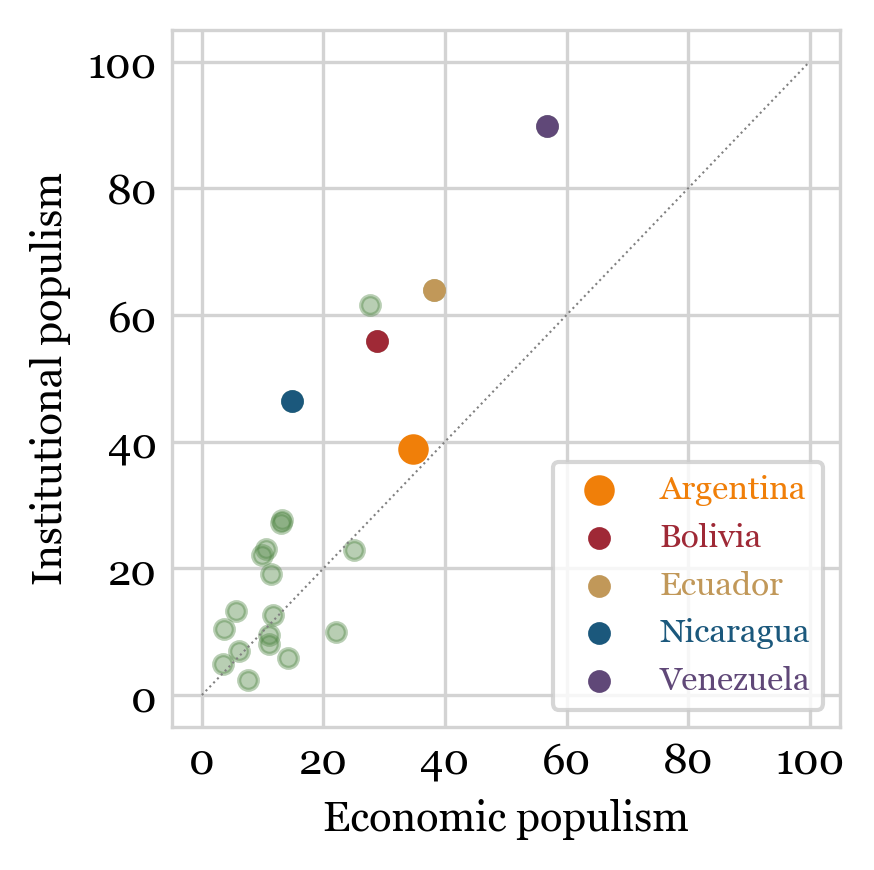

In [177]:
#### ARGENTINA
ARG_A = [ARG['PEP'].iloc[ 0], ARG['PIP'].iloc[ 0]] 
ARG_B = [ARG['PEP'].iloc[ 1], ARG['PIP'].iloc[ 1]]
ARG_E = [ARG['PEP'].iloc[ 8], ARG['PIP'].iloc[ 8]]
ARG_N = [ARG['PEP'].iloc[14], ARG['PIP'].iloc[14]]
ARG_V = [ARG['PEP'].iloc[21], ARG['PIP'].iloc[21]]   

LABELS = ['Argentina', 'Bolivia', 'Ecuador', 'Nicaragua', 'Venezuela']
axis_range = [0, 100, 0, 100]
fig, ax = plt.subplots(figsize=fig_square)
plt.scatter(ARG['PEP'], ARG['PIP'], color = 'C3', s=S[1], alpha=0.4)
plt.scatter(ARG_A[0] , ARG_A[1] , color = 'C0', s=S[0], alpha=1.0, label=LABELS[0])
plt.scatter(ARG_B[0] , ARG_B[1] , color = 'C1', s=S[1], alpha=1.0, label=LABELS[1])
plt.scatter(ARG_E[0] , ARG_E[1] , color = 'C5', s=S[1], alpha=1.0, label=LABELS[2])
plt.scatter(ARG_N[0] , ARG_N[1] , color = 'C2', s=S[1], alpha=1.0, label=LABELS[3])
plt.scatter(ARG_V[0] , ARG_V[1] , color = 'C4', s=S[1], alpha=1.0, label=LABELS[4])
plt.plot([0,100],[0,100], color='gray', ls=':', lw=0.5)
plt.xlabel('Economic populism')
plt.ylabel('Institutional populism')
plt.xticks(np.arange(0, 101, 20))
plt.axis_range = axis_range
plt.legend(labelcolor='linecolor', fontsize=8, loc='lower right')
plt.tight_layout()
#plt.savefig('visualizations/Iconic5_Scatter_ARG')
plt.show()

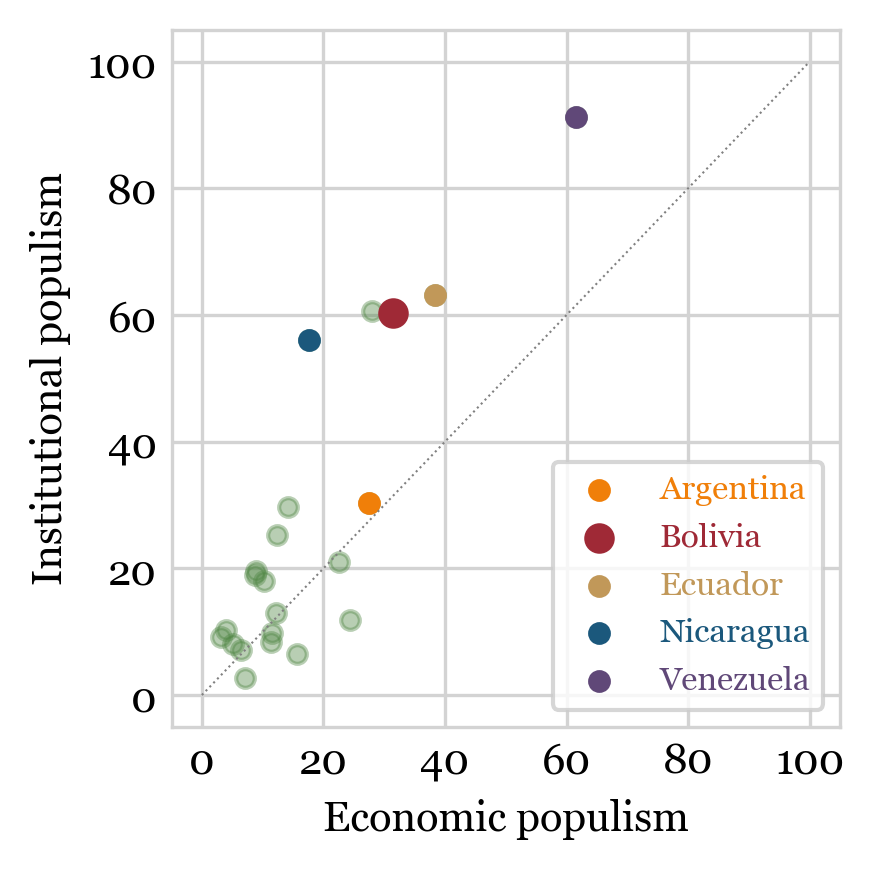

In [178]:
#### BOLIVIA
BOL_A = [BOL['PEP'].iloc[ 0], BOL['PIP'].iloc[ 0]] 
BOL_B = [BOL['PEP'].iloc[ 1], BOL['PIP'].iloc[ 1]]
BOL_E = [BOL['PEP'].iloc[ 8], BOL['PIP'].iloc[ 8]]
BOL_N = [BOL['PEP'].iloc[14], BOL['PIP'].iloc[14]]
BOL_V = [BOL['PEP'].iloc[21], BOL['PIP'].iloc[21]]   

LABELS = ['Argentina', 'Bolivia', 'Ecuador', 'Nicaragua', 'Venezuela']
axis_range = [0, 100, 0, 100]
fig, ax = plt.subplots(figsize=fig_square)
plt.scatter(BOL['PEP'], BOL['PIP'], color = 'C3', s=S[1], alpha=0.4)
plt.scatter(BOL_A[0] , BOL_A[1] , color = 'C0', s=S[1], alpha=1.0, label=LABELS[0])
plt.scatter(BOL_B[0] , BOL_B[1] , color = 'C1', s=S[0], alpha=1.0, label=LABELS[1])
plt.scatter(BOL_E[0] , BOL_E[1] , color = 'C5', s=S[1], alpha=1.0, label=LABELS[2])
plt.scatter(BOL_N[0] , BOL_N[1] , color = 'C2', s=S[1], alpha=1.0, label=LABELS[3])
plt.scatter(BOL_V[0] , BOL_V[1] , color = 'C4', s=S[1], alpha=1.0, label=LABELS[4])
plt.plot([0,100],[0,100], color='gray', ls=':', lw=0.5)
plt.xlabel('Economic populism')
plt.ylabel('Institutional populism')
plt.xticks(np.arange(0, 101, 20))
plt.axis_range = axis_range
plt.legend(labelcolor='linecolor', fontsize=8, loc='lower right')
plt.tight_layout()
#plt.savefig('visualizations/Iconic5_Scatter_BOL')
plt.show()

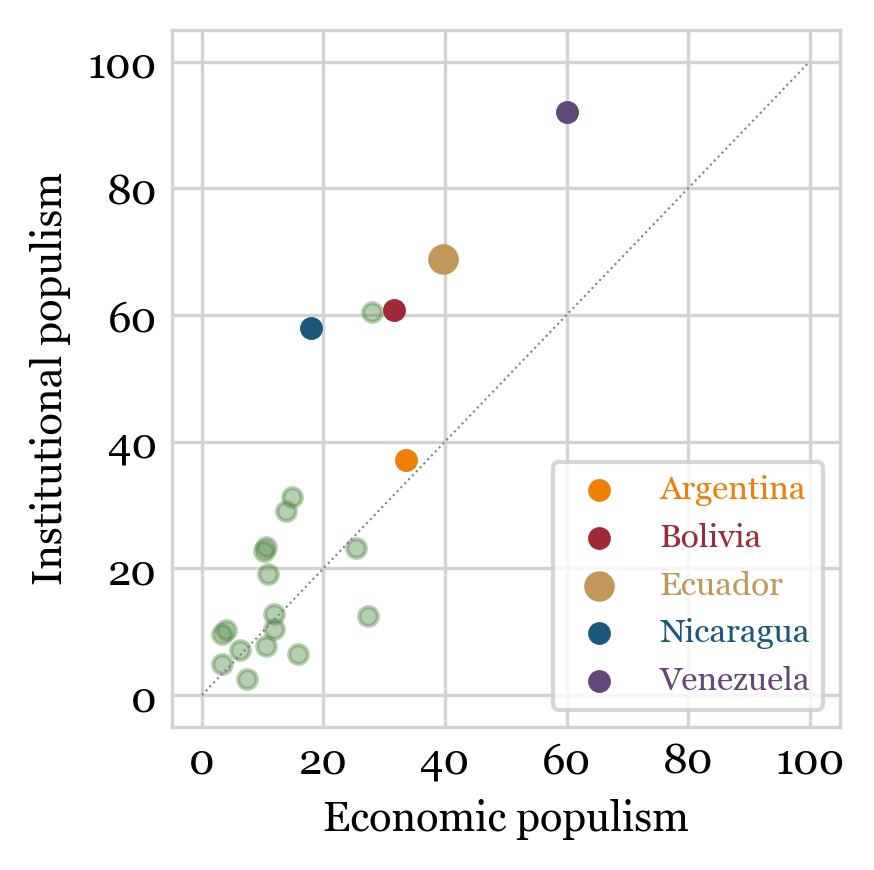

In [179]:
#### ECUADOR
ECU_A = [ECU['PEP'].iloc[ 0], ECU['PIP'].iloc[ 0]] 
ECU_B = [ECU['PEP'].iloc[ 1], ECU['PIP'].iloc[ 1]]
ECU_E = [ECU['PEP'].iloc[ 8], ECU['PIP'].iloc[ 8]]
ECU_N = [ECU['PEP'].iloc[14], ECU['PIP'].iloc[14]]
ECU_V = [ECU['PEP'].iloc[21], ECU['PIP'].iloc[21]]   

LABELS = ['Argentina', 'Bolivia', 'Ecuador', 'Nicaragua', 'Venezuela']
axis_range = [0, 100, 0, 100]
fig, ax = plt.subplots(figsize=fig_square)
plt.scatter(ECU['PEP'], ECU['PIP'], color = 'C3', s=S[1], alpha=0.4)
plt.scatter(ECU_A[0] , ECU_A[1] , color = 'C0', s=S[1], alpha=1.0, label=LABELS[0])
plt.scatter(ECU_B[0] , ECU_B[1] , color = 'C1', s=S[1], alpha=1.0, label=LABELS[1])
plt.scatter(ECU_E[0] , ECU_E[1] , color = 'C5', s=S[0], alpha=1.0, label=LABELS[2])
plt.scatter(ECU_N[0] , ECU_N[1] , color = 'C2', s=S[1], alpha=1.0, label=LABELS[3])
plt.scatter(ECU_V[0] , ECU_V[1] , color = 'C4', s=S[1], alpha=1.0, label=LABELS[4])
plt.plot([0,100],[0,100], color='gray', ls=':', lw=0.5)
plt.xlabel('Economic populism')
plt.ylabel('Institutional populism')
plt.xticks(np.arange(0, 101, 20))
plt.axis_range = axis_range
plt.legend(labelcolor='linecolor', fontsize=8, loc='lower right')
plt.tight_layout()
plt.savefig('visualizations/Iconic5_Scatter_ECU')
plt.show()

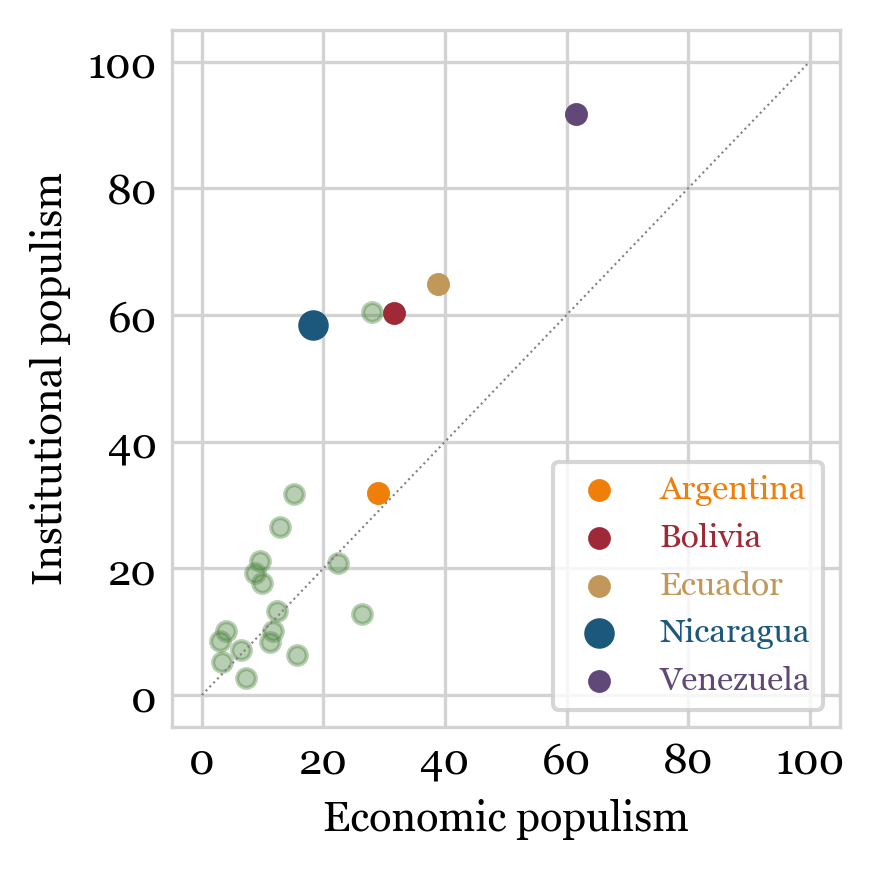

In [180]:
#### NICARAGUA
NIC_A = [NIC['PEP'].iloc[ 0], NIC['PIP'].iloc[ 0]] 
NIC_B = [NIC['PEP'].iloc[ 1], NIC['PIP'].iloc[ 1]]
NIC_E = [NIC['PEP'].iloc[ 8], NIC['PIP'].iloc[ 8]]
NIC_N = [NIC['PEP'].iloc[14], NIC['PIP'].iloc[14]]
NIC_V = [NIC['PEP'].iloc[21], NIC['PIP'].iloc[21]]   

LABELS = ['Argentina', 'Bolivia', 'Ecuador', 'Nicaragua', 'Venezuela']
axis_range = [0, 100, 0, 100]
fig, ax = plt.subplots(figsize=fig_square)
plt.scatter(NIC['PEP'], NIC['PIP'], color = 'C3', s=S[1], alpha=0.4)
plt.scatter(NIC_A[0] , NIC_A[1] , color = 'C0', s=S[1], alpha=1.0, label=LABELS[0])
plt.scatter(NIC_B[0] , NIC_B[1] , color = 'C1', s=S[1], alpha=1.0, label=LABELS[1])
plt.scatter(NIC_E[0] , NIC_E[1] , color = 'C5', s=S[1], alpha=1.0, label=LABELS[2])
plt.scatter(NIC_N[0] , NIC_N[1] , color = 'C2', s=S[0], alpha=1.0, label=LABELS[3])
plt.scatter(NIC_V[0] , NIC_V[1] , color = 'C4', s=S[1], alpha=1.0, label=LABELS[4])
plt.plot([0,100],[0,100], color='gray', ls=':', lw=0.5)
plt.xlabel('Economic populism')
plt.ylabel('Institutional populism')
plt.xticks(np.arange(0, 101, 20))
plt.axis_range = axis_range
plt.legend(labelcolor='linecolor', fontsize=8, loc='lower right')
plt.tight_layout()
plt.savefig('visualizations/Iconic5_Scatter_NIC')
plt.show()

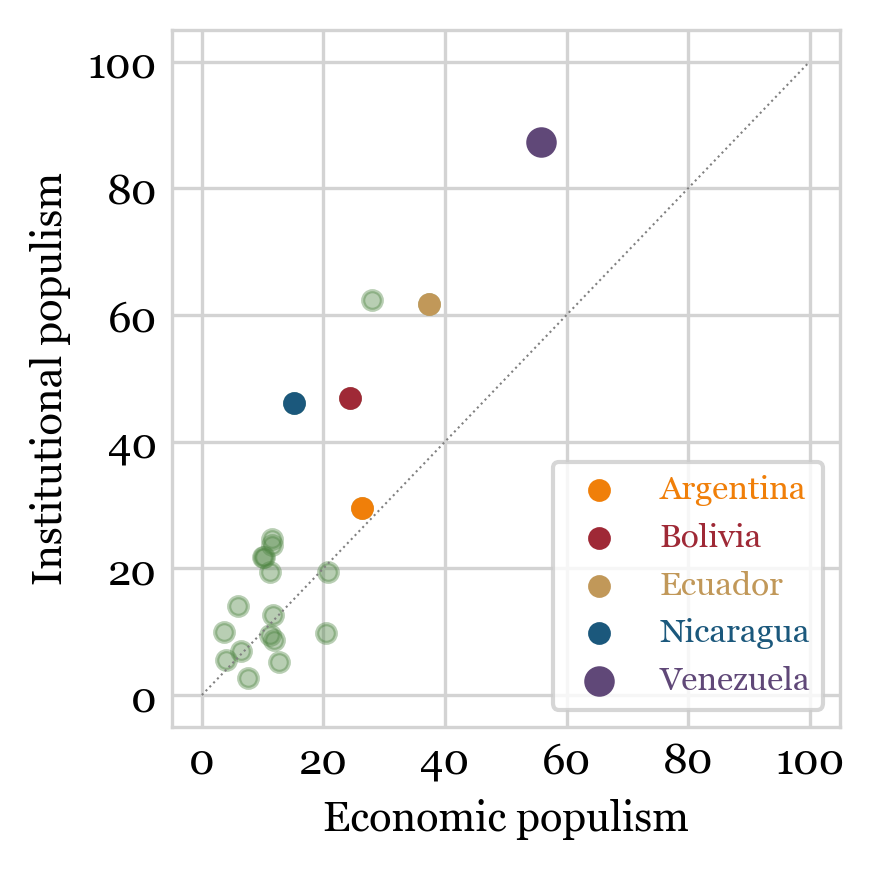

In [181]:
#### VENEZUELA
VEN_A = [VEN['PEP'].iloc[ 0], VEN['PIP'].iloc[ 0]] 
VEN_B = [VEN['PEP'].iloc[ 1], VEN['PIP'].iloc[ 1]]
VEN_E = [VEN['PEP'].iloc[ 8], VEN['PIP'].iloc[ 8]]
VEN_N = [VEN['PEP'].iloc[14], VEN['PIP'].iloc[14]]
VEN_V = [VEN['PEP'].iloc[21], VEN['PIP'].iloc[21]]   

LABELS = ['Argentina', 'Bolivia', 'Ecuador', 'Nicaragua', 'Venezuela']
axis_range = [0, 100, 0, 100]
fig, ax = plt.subplots(figsize=fig_square)
plt.scatter(VEN['PEP'], VEN['PIP'], color = 'C3', s=S[1], alpha=0.4)
plt.scatter(VEN_A[0] , VEN_A[1] , color = 'C0', s=S[1], alpha=1.0, label=LABELS[0])
plt.scatter(VEN_B[0] , VEN_B[1] , color = 'C1', s=S[1], alpha=1.0, label=LABELS[1])
plt.scatter(VEN_E[0] , VEN_E[1] , color = 'C5', s=S[1], alpha=1.0, label=LABELS[2])
plt.scatter(VEN_N[0] , VEN_N[1] , color = 'C2', s=S[1], alpha=1.0, label=LABELS[3])
plt.scatter(VEN_V[0] , VEN_V[1] , color = 'C4', s=S[0], alpha=1.0, label=LABELS[4])
plt.plot([0,100],[0,100], color='gray', ls=':', lw=0.5)
plt.xlabel('Economic populism')
plt.ylabel('Institutional populism')
plt.xticks(np.arange(0, 101, 20))
plt.axis_range = axis_range
plt.legend(labelcolor='linecolor', fontsize=8, loc='lower right')
plt.tight_layout()
plt.savefig('visualizations/Iconic5_Scatter_VEN')
plt.show()